<b>Objective</b></br>
* To identify the significant features that has an effect on predicting the total amount.</br>
* To identify the significant features that has an effect on predicting the trip duration.</br>

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

from scipy import stats

In [220]:
# import the cleaned dataset
taxidf = pd.read_csv('taxidf1.csv')

taxidf.drop(columns = 'Unnamed: 0', inplace = True)

taxidf.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_duration_secs,pickup_date,dropoff_date,pickup_hour,drop_hour,pickup_day,dropoff_day
0,2,2023-04-03 16:00:05,2023-04-03 16:10:40,1,1.41,1.0,N,162,137,2,11.4,0.0,0.5,0.0,0.0,1.0,15.4,2.5,0.0,Manhattan,Midtown East,Yellow Zone,Manhattan,Kips Bay,Yellow Zone,635.0,2023-04-03,2023-04-03,16,16,Monday,Monday
1,2,2023-04-03 16:44:51,2023-04-03 16:49:59,1,0.78,1.0,N,43,230,2,6.5,0.0,0.5,0.0,0.0,1.0,10.5,2.5,0.0,Manhattan,Central Park,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone,308.0,2023-04-03,2023-04-03,16,16,Monday,Monday
2,2,2023-04-03 16:00:26,2023-04-03 16:14:36,1,1.89,1.0,N,75,237,2,14.9,0.0,0.5,0.0,0.0,1.0,18.9,2.5,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,Upper East Side South,Yellow Zone,850.0,2023-04-03,2023-04-03,16,16,Monday,Monday
3,2,2023-04-03 16:00:13,2023-04-03 16:09:27,5,2.00,1.0,N,238,166,1,11.4,0.0,0.5,1.0,0.0,1.0,16.4,2.5,0.0,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Morningside Heights,Boro Zone,554.0,2023-04-03,2023-04-03,16,16,Monday,Monday
4,2,2023-04-03 16:01:17,2023-04-03 16:14:46,1,2.19,1.0,N,229,234,1,14.2,0.0,0.5,1.0,0.0,1.0,19.2,2.5,0.0,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Union Sq,Yellow Zone,809.0,2023-04-03,2023-04-03,16,16,Monday,Monday


In [221]:
# shape of the dataset
taxidf.shape

(132013, 32)

In [222]:
# dataset information
taxidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132013 entries, 0 to 132012
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               132013 non-null  int64  
 1   tpep_pickup_datetime   132013 non-null  object 
 2   tpep_dropoff_datetime  132013 non-null  object 
 3   passenger_count        132013 non-null  int64  
 4   trip_distance          132013 non-null  float64
 5   RatecodeID             132013 non-null  float64
 6   store_and_fwd_flag     132013 non-null  object 
 7   PULocationID           132013 non-null  int64  
 8   DOLocationID           132013 non-null  int64  
 9   payment_type           132013 non-null  int64  
 10  fare_amount            132013 non-null  float64
 11  extra                  132013 non-null  float64
 12  mta_tax                132013 non-null  float64
 13  tip_amount             132013 non-null  float64
 14  tolls_amount           132013 non-nu

In [223]:
# make a copy of the dataframe
taxidf1 = taxidf.copy()
taxidf1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_duration_secs,pickup_date,dropoff_date,pickup_hour,drop_hour,pickup_day,dropoff_day
0,2,2023-04-03 16:00:05,2023-04-03 16:10:40,1,1.41,1.0,N,162,137,2,11.4,0.0,0.5,0.0,0.0,1.0,15.4,2.5,0.0,Manhattan,Midtown East,Yellow Zone,Manhattan,Kips Bay,Yellow Zone,635.0,2023-04-03,2023-04-03,16,16,Monday,Monday
1,2,2023-04-03 16:44:51,2023-04-03 16:49:59,1,0.78,1.0,N,43,230,2,6.5,0.0,0.5,0.0,0.0,1.0,10.5,2.5,0.0,Manhattan,Central Park,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone,308.0,2023-04-03,2023-04-03,16,16,Monday,Monday
2,2,2023-04-03 16:00:26,2023-04-03 16:14:36,1,1.89,1.0,N,75,237,2,14.9,0.0,0.5,0.0,0.0,1.0,18.9,2.5,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,Upper East Side South,Yellow Zone,850.0,2023-04-03,2023-04-03,16,16,Monday,Monday
3,2,2023-04-03 16:00:13,2023-04-03 16:09:27,5,2.00,1.0,N,238,166,1,11.4,0.0,0.5,1.0,0.0,1.0,16.4,2.5,0.0,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Morningside Heights,Boro Zone,554.0,2023-04-03,2023-04-03,16,16,Monday,Monday
4,2,2023-04-03 16:01:17,2023-04-03 16:14:46,1,2.19,1.0,N,229,234,1,14.2,0.0,0.5,1.0,0.0,1.0,19.2,2.5,0.0,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Union Sq,Yellow Zone,809.0,2023-04-03,2023-04-03,16,16,Monday,Monday


<b>To identify the significant features that has an effect on predicting the total amount.</b>

<b>VendorID Feature</b>

In [224]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


one = taxidf1[taxidf1.VendorID == 1]['total_amount']
two = taxidf1[taxidf1.VendorID == 2]['total_amount']

print(stats.shapiro(one))
print(stats.shapiro(two))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one, two)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.6572449803352356, pvalue=0.0)
ShapiroResult(statistic=0.6771702170372009, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# Since the assumptions did not satisfy; proceeding with non-paramteric test

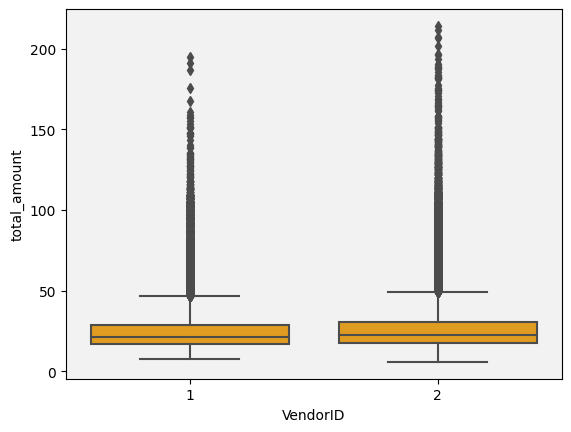

In [225]:
# Mann Whitney U - checking the assumption of similar distributions for groups
ax = plt.axes()
sns.boxplot(x=taxidf1.VendorID, y=taxidf1.total_amount, color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.show()

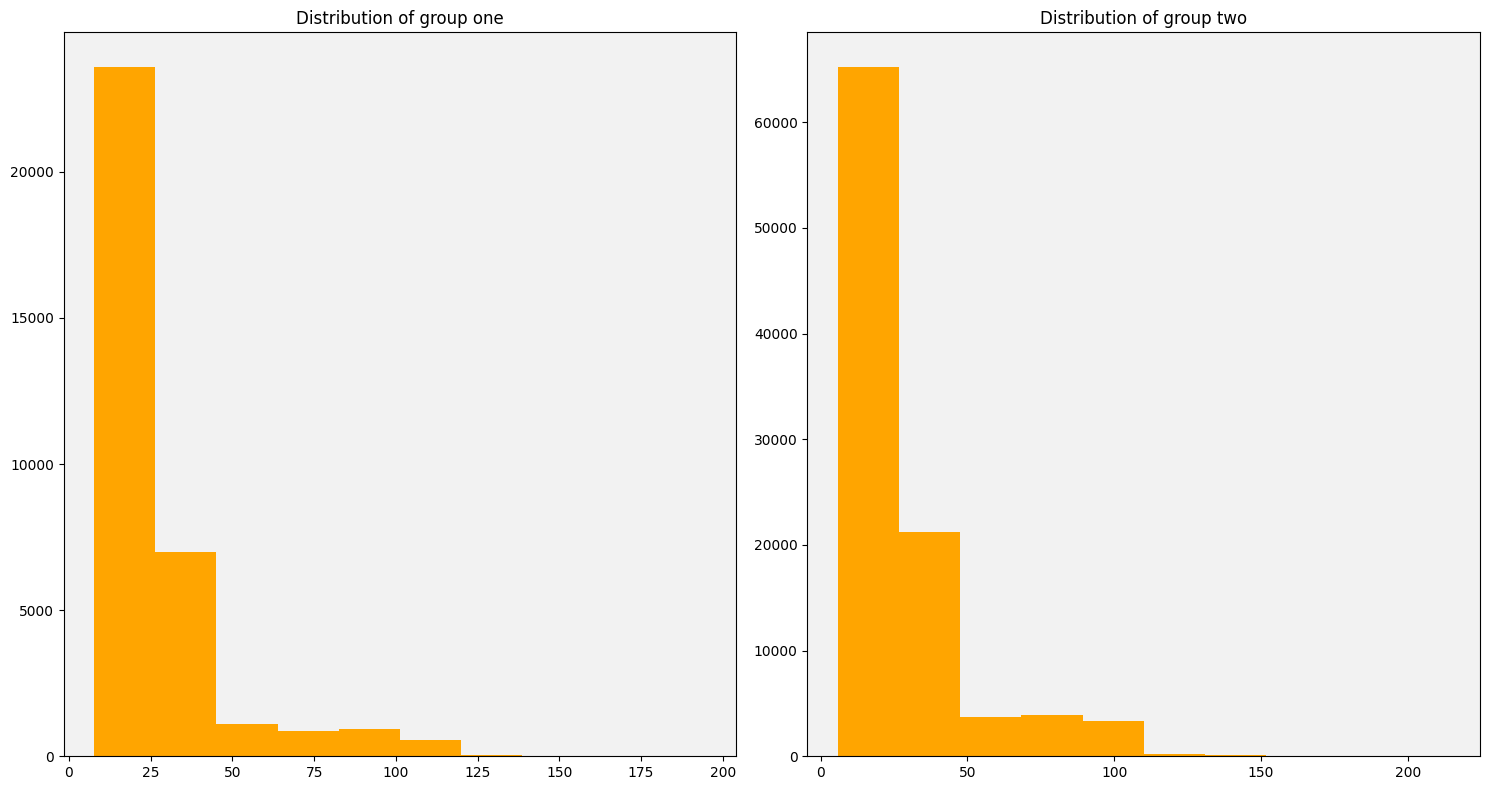

In [226]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(15, 8))

# Plot the histogram for 'one' in the first subplot
plt.subplot(1, 2, 1)
plt.hist(one, color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' in the second subplot
plt.subplot(1, 2, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()


<b>Mann-Whitney U Test to check dependency of total amount on vendor ID</b>

Null Hypothesis = Ho = "Mean total amount of vendor ID 1 is same as that of vendor ID 2" 

Alternate Hypothesis = Ha = "Mean total amount of vendor ID 1 is different from vendor ID 2"  

This will be a two-tailed test.

`Significance Level = 0.05`

In [227]:
# Mann-Whitney U Test to check dependency of total amount on vendor ID
Ho = "Mean total amount of vendor ID 1 is s0ame as that of vendor ID 2"   # Stating the Null Hypothesis
Ha = "Mean total amount of vendor ID 1 is different from vendor ID 2"   # Stating the Alternate Hypothesis

t_vi, pval_vi  = stats.mannwhitneyu(one, two)  
# print('p-value : ', pval_vi)

if pval_vi < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_vi.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_vi.round(3)} > 0.05')

Mean total amount of vendor ID 1 is different from vendor ID 2 as the p_value 0.0 < 0.05


<b>Passenger Count Feature</b>

In [228]:
#cheking the assumptions for ANOVA

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


one = taxidf1[taxidf1.passenger_count == 1]['total_amount']
two = taxidf1[taxidf1.passenger_count == 2]['total_amount']
three = taxidf1[taxidf1.passenger_count == 3]['total_amount']
four = taxidf1[taxidf1.passenger_count == 4]['total_amount']
five = taxidf1[taxidf1.passenger_count == 5]['total_amount']
six = taxidf1[taxidf1.passenger_count == 6]['total_amount']

print(stats.shapiro(one))
print(stats.shapiro(two))
print(stats.shapiro(three))
print(stats.shapiro(four))
print(stats.shapiro(five))
print(stats.shapiro(six))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one, two, three, four, five, six)
# print("\nLevene test statistics :", levene_stat)
# print("\nLevene p-value :", levene_pval)

if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.6703773736953735, pvalue=0.0)
ShapiroResult(statistic=0.6903125643730164, pvalue=0.0)
ShapiroResult(statistic=0.6918766498565674, pvalue=0.0)
ShapiroResult(statistic=0.7128989100456238, pvalue=0.0)
ShapiroResult(statistic=0.6761742234230042, pvalue=0.0)
ShapiroResult(statistic=0.6738338470458984, pvalue=1.8461126358554438e-40)
Data has unequal variance as the p_value 0.0 < 0.05


Since the assumptions for ANOVA is not satisfied, proceeding with non-parametric test (Kruskal-Wallis H Test).

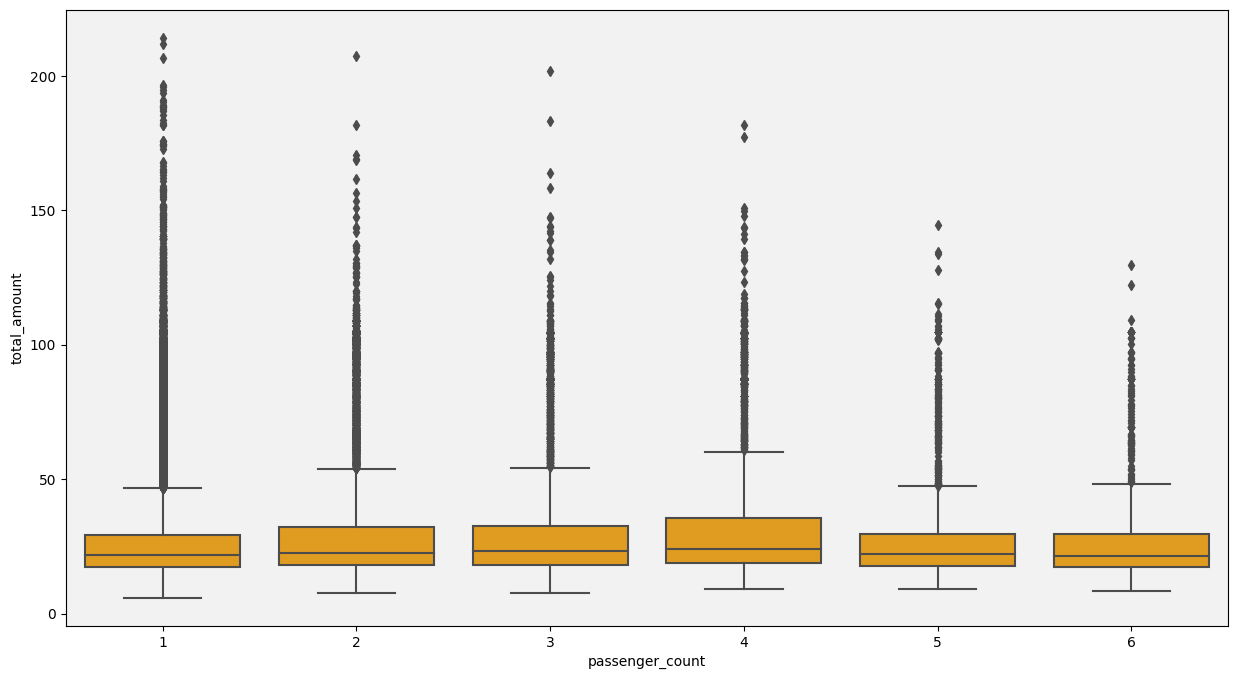

In [229]:
# Kruskal wallis H - checking the assumption of similar distributions for groups
plt.figure(figsize = (15,8))
ax = plt.axes()
ax.set_facecolor("#F2F2F2") 
sns.boxplot(x=taxidf1.passenger_count, y=taxidf1.total_amount, color = 'orange')
plt.show()

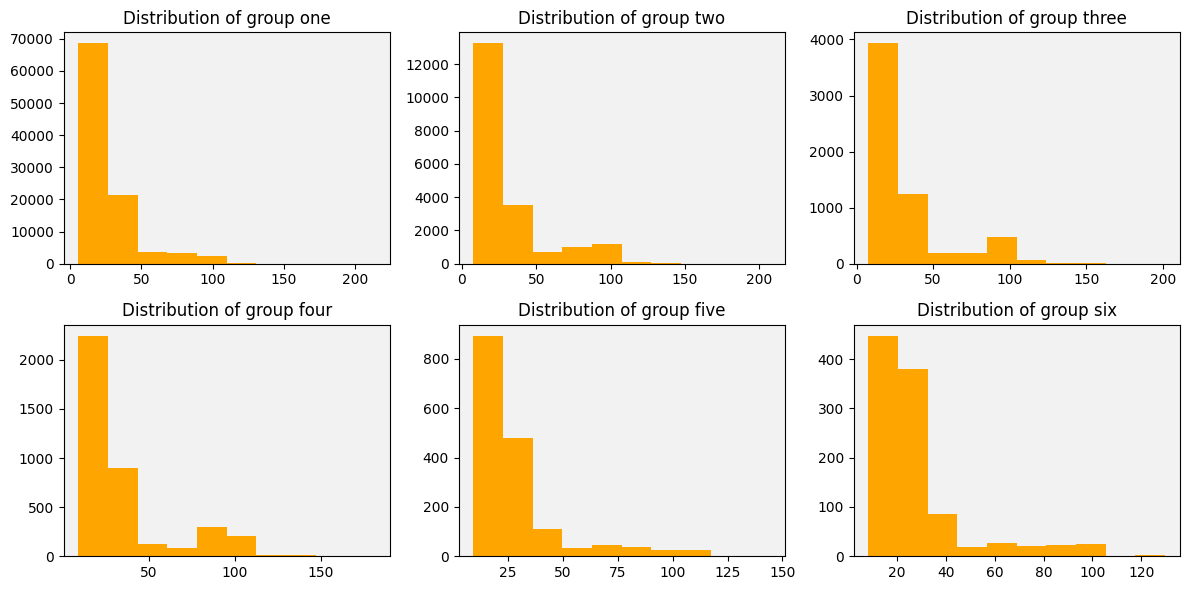

In [230]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# Plot the histogram for 'one' in the first subplot
plt.subplot(2, 3, 1)
plt.hist(one, color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' 
plt.subplot(2,3, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'three' 
plt.subplot(2,3, 3)
plt.hist(three, color='orange')
plt.title('Distribution of group three')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'four' 
plt.subplot(2,3, 4)
plt.hist(four, color='orange')
plt.title('Distribution of group four')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'five' 
plt.subplot(2,3, 5)
plt.hist(five, color='orange')
plt.title('Distribution of group five')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'Six' 
plt.subplot(2,3, 6)
plt.hist(six, color='orange')
plt.title('Distribution of group six')
plt.gca().set_facecolor("#F2F2F2")

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Since the deviations in the distribution is not very high, proceeding with Kruskal wallis h

<b>Kruskal-Wallis H Test to check dependency of total amount on Passenger count </b>

Null Hypothesis = Ho = "Passenger Count has no effect on total amount" 

Alternate Hypothesis = Ha = "Passenger Count has an effect on total amount"  


`Significance Level = 0.05`

In [231]:
# Kruskal test to check dependency of passenger on total amount
Ho = "No. of passenger has no effect on total amount"   # Stating the Null Hypothesis
Ha = "No. of passenger has an effect on total amount"   # Stating the Alternate Hypothesis

f_pc, pval_pc = stats.kruskal(one, two, three, four, five, six)
# print('p-value : ', pval_pc)

print(pval_pc)

if pval_pc < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_pc.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_pc.round(3)} > 0.05')

3.0476283673960344e-105
No. of passenger has an effect on total amount as the p_value 0.0 < 0.05


<b>Trip Distance Feature</b>

In [232]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


total_amount = taxidf1['total_amount']
trip_distance = taxidf1['trip_distance']

print(stats.shapiro(total_amount))
print(stats.shapiro(trip_distance))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(total_amount, trip_distance)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.6719603538513184, pvalue=0.0)
ShapiroResult(statistic=0.5945682525634766, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
#As the assumptions of the Pearson R did not meet, proceeding with Spearman R

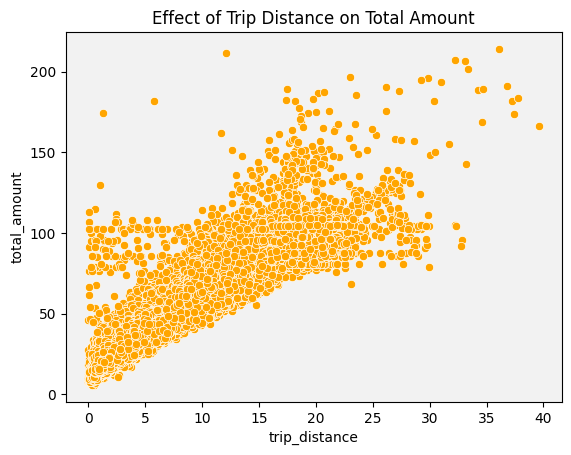

In [233]:
#Assumption of Spearman R - Monotonicity
ax = plt.axes()
sns.scatterplot(x=taxidf1['trip_distance'], y=taxidf1['total_amount'], color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.title('Effect of Trip Distance on Total Amount')
plt.show()

In [ ]:
# The assumption of monotonicity satisfies therefore Spearman R is being used

<b>Spearman's Rho Test to check dependency of total amount on trip distance </b>

Null Hypothesis = Ho = "Trip distance has no effect on total amount" 

Alternate Hypothesis = Ha = "Trip distance has an effect on total amount"  

This will be a two-tailed test.

`Significance Level = 0.05`

In [234]:
# Spearman's Rho Test to check dependency of total amount on trip distance
Ho = "Trip distance has no effect on total amount"   # Stating the Null Hypothesis
Ha = "Trip distance has an effect on total amount"   # Stating the Alternate Hypothesis

rho, pval_td = stats.spearmanr(taxidf1['trip_distance'], taxidf1['total_amount'])
# print("p-value : ", pval_td)

if pval_td < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({pval_td.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({pval_td.round(3)}) > 0.05')

Trip distance has an effect on total amount as the p_value (0.0) < 0.05


<b>RateCodeID Feature</b>

In [235]:
#cheking the assumptions for ANOVA

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


one = taxidf1[taxidf1.RatecodeID == 1]['total_amount']
two = taxidf1[taxidf1.RatecodeID == 2]['total_amount']
three = taxidf1[taxidf1.RatecodeID == 3]['total_amount']
four = taxidf1[taxidf1.RatecodeID == 4]['total_amount']
five = taxidf1[taxidf1.RatecodeID == 5]['total_amount']


print(stats.shapiro((1/one)))
print(stats.shapiro(two))
print(stats.shapiro(three))
print(stats.shapiro(four))
print(stats.shapiro(five))

#only one group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one, two, three, four, five)
# print("\nLevene test statistics :", levene_stat)
# print("\nLevene p-value :", levene_pval)

if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.9939897060394287, pvalue=0.0)
ShapiroResult(statistic=0.900083065032959, pvalue=0.0)
ShapiroResult(statistic=0.9440262913703918, pvalue=8.542161644697899e-09)
ShapiroResult(statistic=0.9458591938018799, pvalue=0.3637944161891937)
ShapiroResult(statistic=0.9453018307685852, pvalue=0.0032583693973720074)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# proceeding with assumptions of kruskal wallis h as assumptions of Anova did not meet

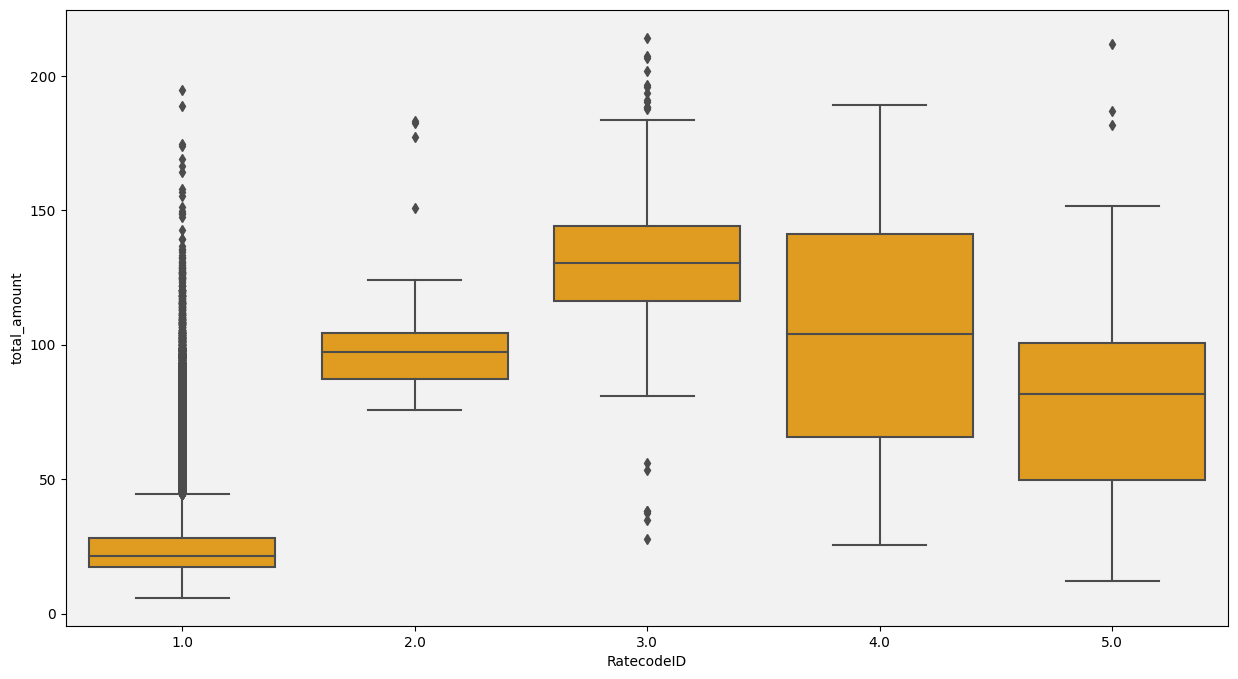

In [34]:
# Kruskal wallis H - checking the assumption of similar distributions for groups
plt.figure(figsize = (15,8))
ax = plt.axes()
ax.set_facecolor("#F2F2F2") 
sns.boxplot(x=taxidf1.RatecodeID, y=taxidf1.total_amount, color = 'orange')
plt.show()

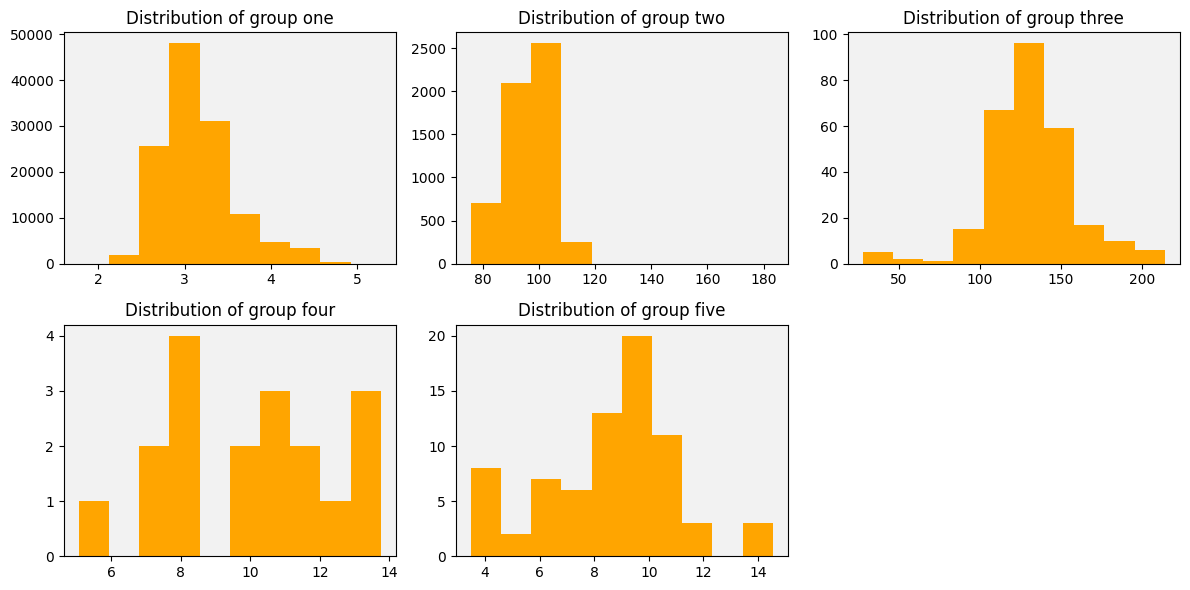

In [236]:
#transforming the columns to make it more similar to perform kruskal wallis h
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# Plot the histogram for 'one' 
plt.subplot(2, 3, 1)
plt.hist(np.log(one), color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' 
plt.subplot(2,3, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'three' 
plt.subplot(2,3, 3)
plt.hist(three, color='orange')
plt.title('Distribution of group three')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'four' 
plt.subplot(2,3, 4)
plt.hist(np.sqrt(four), color='orange')
plt.title('Distribution of group four')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'five' 
plt.subplot(2,3, 5)
plt.hist(np.sqrt(five), color='orange')
plt.title('Distribution of group five')
plt.gca().set_facecolor("#F2F2F2")


# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Since the distributions are likely similar; proceeding with kruskal test

<b>Kruskal-Wallis H Test to check dependency of total amount on ratecodeID </b>

Null Hypothesis = Ho = "Rate Code ID has no effect on total amount" 

Alternate Hypothesis = Ha = "Rate Code ID has an effect on total amount"  


`Significance Level = 0.05`

In [237]:
# # Kruskal test to check dependency of passenger on total amount
Ho = "RateCode ID has no effect on total amount"   # Stating the Null Hypothesis
Ha = "RateCode ID has an effect on total amount"   # Stating the Alternate Hypothesis

one = np.log(taxidf1[taxidf1.RatecodeID == 1]['total_amount'])
two = taxidf1[taxidf1.RatecodeID == 2]['total_amount']
three = taxidf1[taxidf1.RatecodeID == 3]['total_amount']
four = np.sqrt(taxidf1[taxidf1.RatecodeID == 4]['total_amount'])
five = np.sqrt(taxidf1[taxidf1.RatecodeID == 5]['total_amount'])



f_ri, pval_ri = stats.kruskal(one, two, three, four, five)
# print('p-value : ', pval_ri)

if pval_ri < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({pval_ri.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({pval_ri.round(3)}) > 0.05')

RateCode ID has an effect on total amount as the p_value (0.0) < 0.05


<b>Store and Fwd Flag Feature</b>

In [238]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


one = taxidf1[taxidf1.store_and_fwd_flag == 'Y']['total_amount']
two = taxidf1[taxidf1.store_and_fwd_flag == 'N']['total_amount']

print(stats.shapiro(one))
print(stats.shapiro(two))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one, two)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.694226861000061, pvalue=2.849208464055567e-32)
ShapiroResult(statistic=0.6718813180923462, pvalue=0.0)
Data has unequal variance as the p_value 0.005 < 0.05


In [ ]:
# assumptions of t test did not meet, testing the assumptions of Manwhitney U

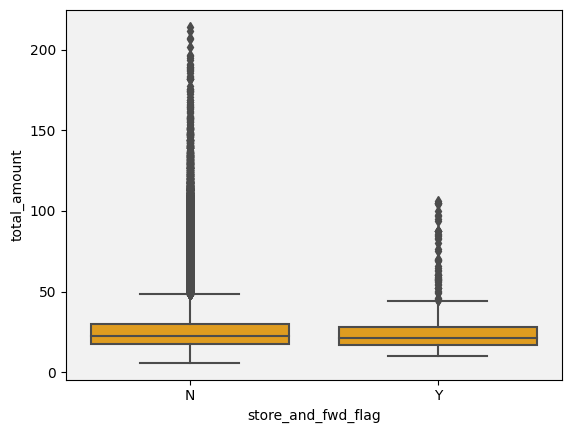

In [239]:
# Mann Whitney U - checking the assumption of similar distributions for groups
ax = plt.axes()
sns.boxplot(x=taxidf1.store_and_fwd_flag, y=taxidf1.total_amount, color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.show()

In [ ]:
# the shapes of the distributions are somewhat similar proceeding with Mann-whitney U

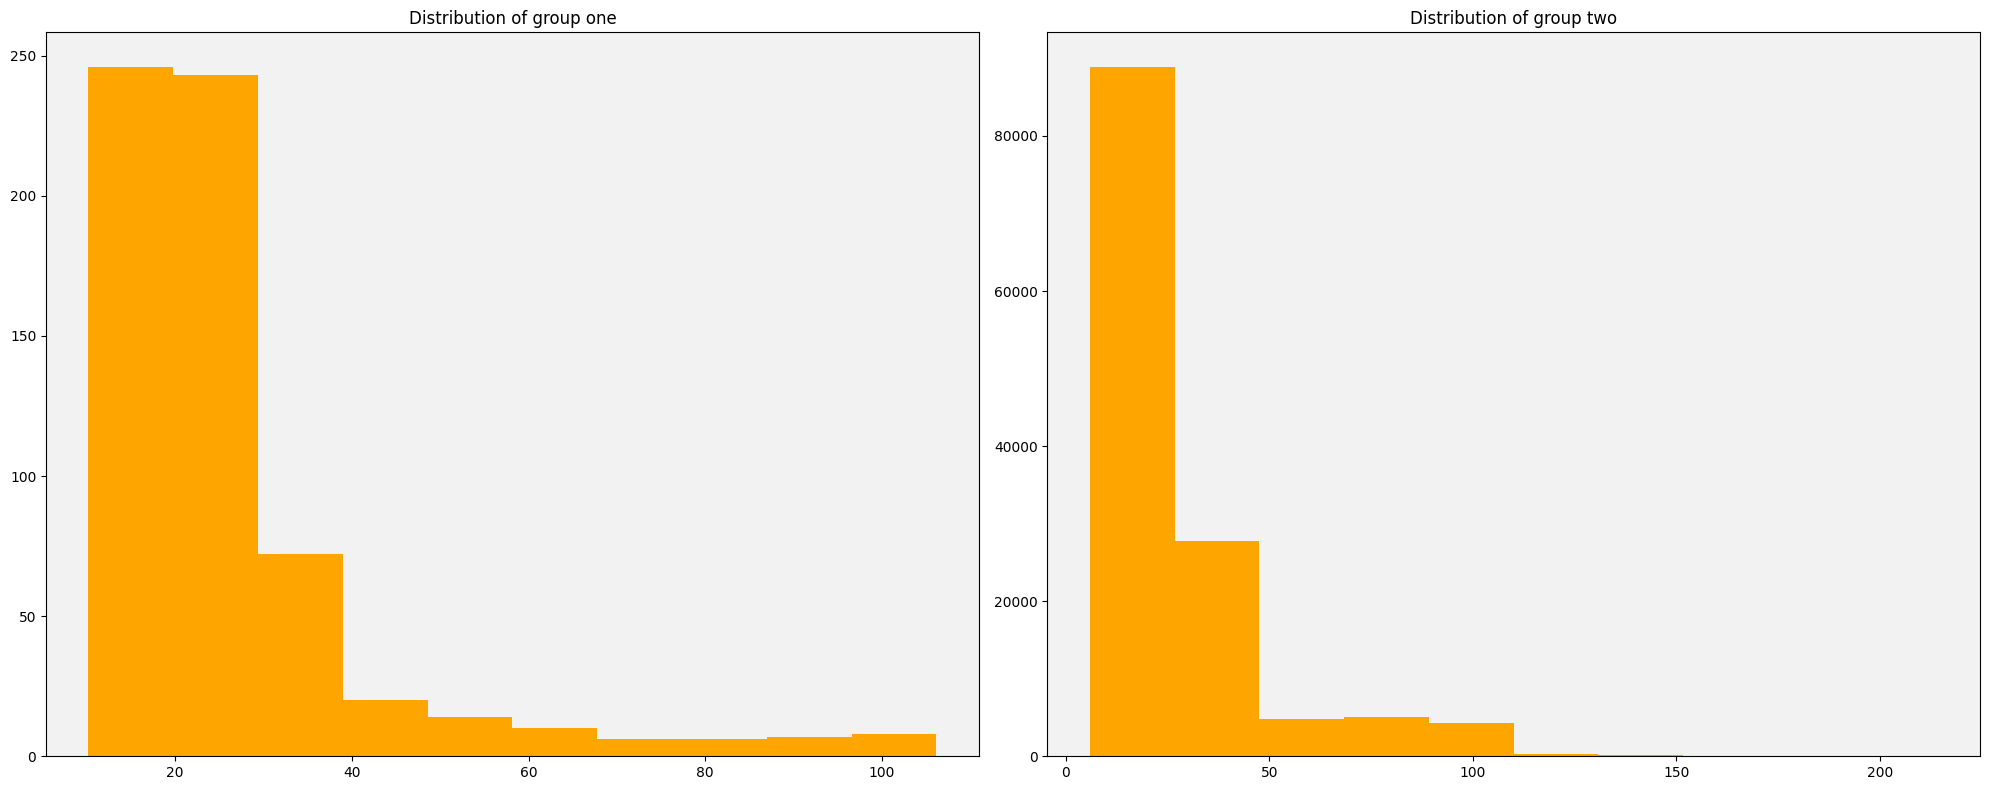

In [240]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(20, 8))

# Plot the histogram for 'one' in the first subplot
plt.subplot(1, 2, 1)
plt.hist(one, color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' in the second subplot
plt.subplot(1, 2, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

<b>Mann-Whitney U Test to check dependency of total amount on store and forward flag</b>

Null Hypothesis = Ho = "Mean total amount is same for both groups in store and forward flag"

Alternate Hypothesis = Ha = "Mean total amount is different for both groups in store and forward flag"

This will be a two-tailed test.

`Significance Level = 0.05`

In [241]:
# Mann-Whitney U Test to check dependency of total amount on store and forward flag
Ho = "Mean total amount is same for both groups in store and forward flag"   # Stating the Null Hypothesis
Ha = "Mean total amount is different for both groups in store and forward flag"   # Stating the Alternate Hypothesis

yes = np.array(taxidf1[taxidf1.store_and_fwd_flag == 'Y']['total_amount']) 
no = np.array(taxidf1[taxidf1.store_and_fwd_flag == 'N']['total_amount']) 

t_sf, pval_sf  = stats.mannwhitneyu(yes, no)
# print('p-value : ', pval_sf)

if pval_sf < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({pval_sf.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({pval_sf.round(3)}) > 0.05')

Mean total amount is different for both groups in store and forward flag as the p_value (0.043) < 0.05


<b>Payment Type Feature</b>

In [242]:
#cheking the assumptions for ANOVA

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


one = taxidf1[taxidf1.payment_type == 1]['total_amount']
two = taxidf1[taxidf1.payment_type == 2]['total_amount']
three = taxidf1[taxidf1.payment_type == 3]['total_amount']
four = taxidf1[taxidf1.payment_type == 4]['total_amount']

print(stats.shapiro(one))
print(stats.shapiro(two))
print(stats.shapiro(three))
print(stats.shapiro(four))


#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one, two, three, four)

if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.6625087261199951, pvalue=0.0)
ShapiroResult(statistic=0.6688987016677856, pvalue=0.0)
ShapiroResult(statistic=0.6532333493232727, pvalue=2.8473710966078872e-27)
ShapiroResult(statistic=0.6841634511947632, pvalue=6.266915098837525e-35)
Data has equal variance as the p_value 0.365 > 0.05


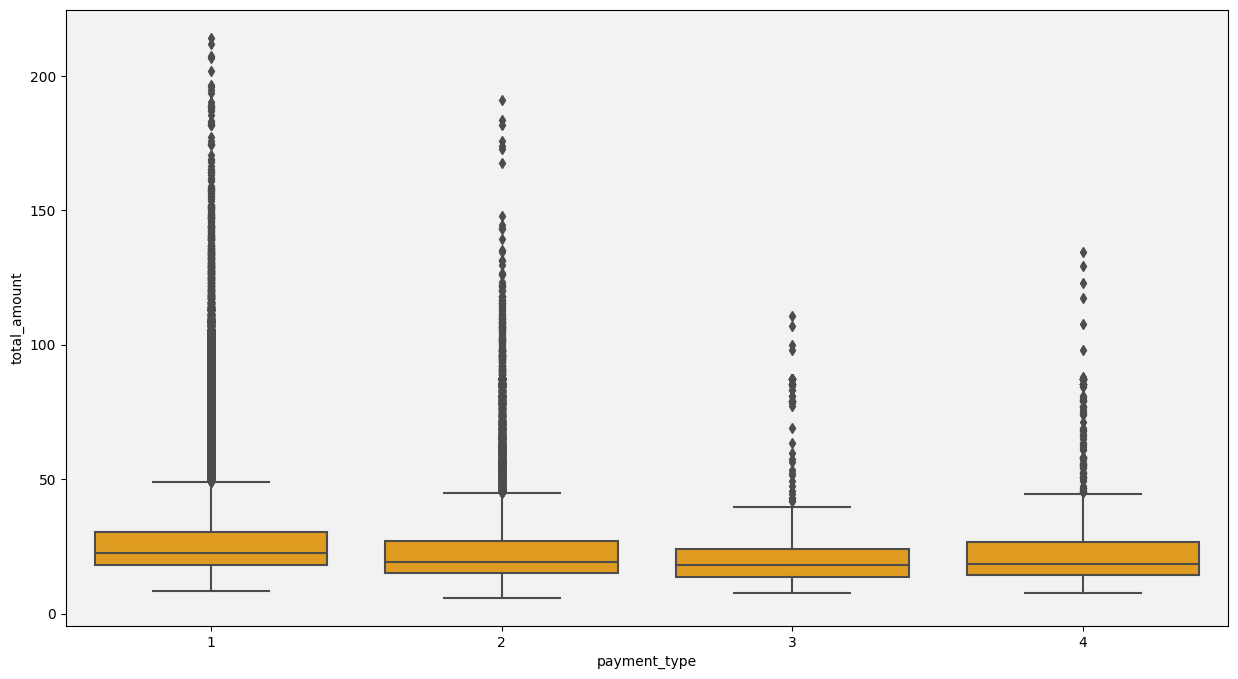

In [48]:
# Kruskal wallis H - checking the assumption of similar distributions for groups
plt.figure(figsize = (15,8))
ax = plt.axes()
ax.set_facecolor("#F2F2F2") 
sns.boxplot(x=taxidf1.payment_type, y=taxidf1.total_amount, color = 'orange')
plt.show()

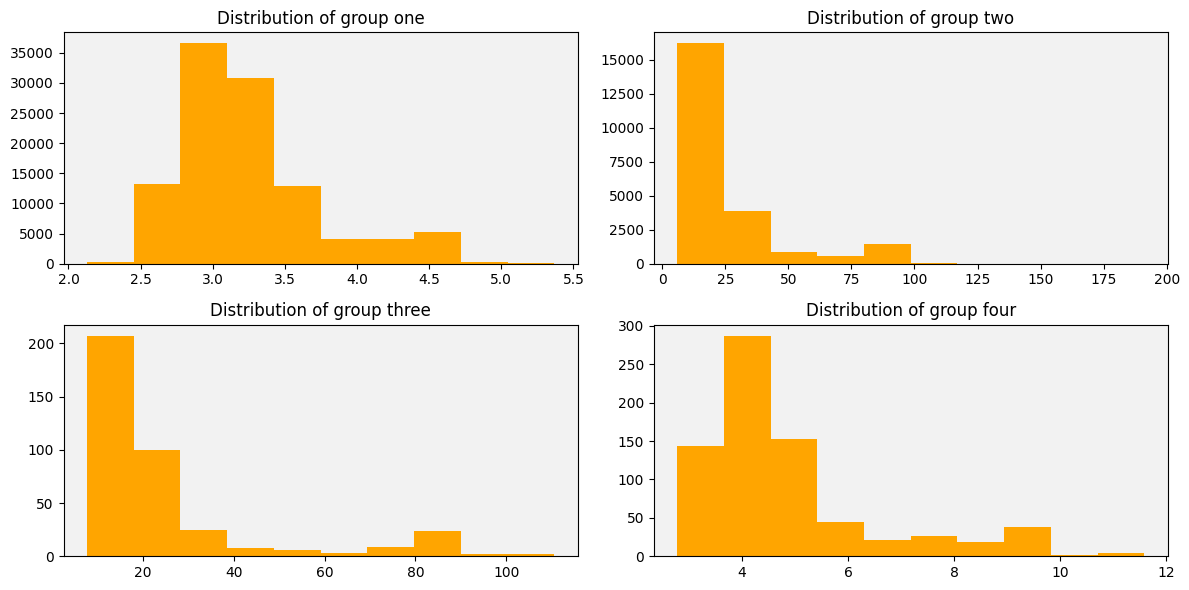

In [243]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# Plot the histogram for 'one' 
plt.subplot(2, 2, 1)
plt.hist(np.log(one), color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' 
plt.subplot(2,2, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'three' 
plt.subplot(2,2, 3)
plt.hist(three, color='orange')
plt.title('Distribution of group three')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'four' 
plt.subplot(2,2, 4)
plt.hist(np.sqrt(four), color='orange')
plt.title('Distribution of group four')
plt.gca().set_facecolor("#F2F2F2")


# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# meeting the assumption of similar distribution shape of Kruskal wallis H

<b>Kruskal-Wallis H Test to check dependency of total amount on payment type</b>

Null Hypothesis = Ho = "Payment type has no effect on total amount"

Alternate Hypothesis = Ha = "Payment type has an effect on total amount"

`Significance Level = 0.05`

In [244]:
# Kruskal test to check dependency of payment type on total amount
Ho = "Payment Type has no effect on total amount"   # Stating the Null Hypothesis
Ha = "Payment Type has an effect on total amount"   # Stating the Alternate Hypothesis


f_pt, pval_pt = stats.kruskal(one, two, three, four)
# print('p-value : ', pval_pt)


if pval_pt < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_pt.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_pt.round(3)} > 0.05')

Payment Type has an effect on total amount as the p_value 0.0 < 0.05


<b>Fare Amount Feature</b>

In [245]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


total_amount = taxidf1['total_amount']
fare_amount = taxidf1['fare_amount']

print(stats.shapiro(total_amount))
print(stats.shapiro(fare_amount))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(total_amount, fare_amount)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.6719603538513184, pvalue=0.0)
ShapiroResult(statistic=0.6863034963607788, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# assumptions of Pearson R are not met proceeding with Spearman R

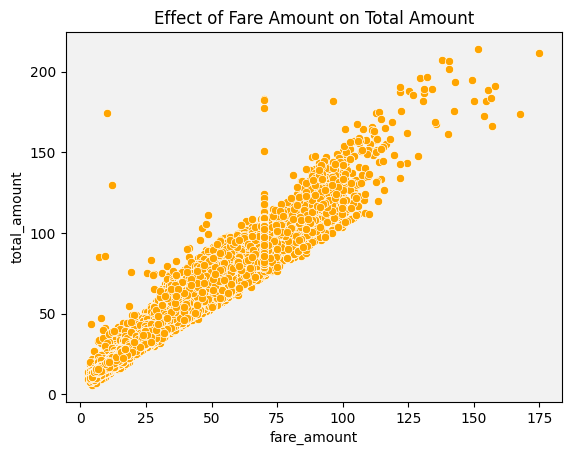

In [246]:
#Assumption of Spearman R - Monotonicity
ax = plt.axes()
sns.scatterplot(x=taxidf1['fare_amount'], y=taxidf1['total_amount'], color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.title('Effect of Fare Amount on Total Amount')
plt.show()

In [ ]:
# assumption of monotonicity is met

<b>Spearman's Rho Test to check dependency of total amount on fare amount</b>

Null Hypothesis = Ho = "Fare amount has no effect on total amount"

Alternate Hypothesis = Ha = "Fare amount has an effect on total amount"

This will be a two-tailed test.

`Significance Level = 0.05`

In [247]:
# Spearman's Rho Test to check dependency of total amount on fare amount
Ho = "Fare amount has no effect on total amount"   # Stating the Null Hypothesis
Ha = "Fare amount has an effect on total amount"   # Stating the Alternate Hypothesis

rho_fa, pval_fa = stats.spearmanr(taxidf1['fare_amount'], taxidf1['total_amount'])
# print("p-value : ", pval_fa)

if pval_fa < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_fa.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_fa.round(3)} > 0.05')

Fare amount has an effect on total amount as the p_value 0.0 < 0.05


<b>Extra Feature</b>

In [248]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


total_amount = taxidf1['total_amount']
extra = taxidf1['extra']

print(stats.shapiro(total_amount))
print(stats.shapiro(extra))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(total_amount, extra)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.6719603538513184, pvalue=0.0)
ShapiroResult(statistic=0.34968101978302, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# assumptions of Pearson R are not met proceeding with Spearman R

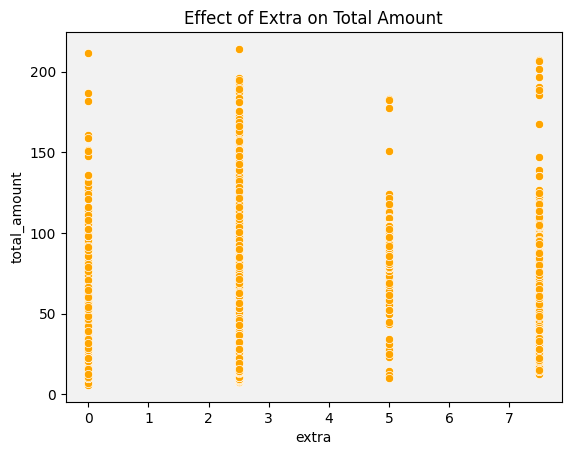

In [249]:
#Assumption of Spearman R - Monotonicity
ax = plt.axes()
sns.scatterplot(x=taxidf1['extra'], y=taxidf1['total_amount'], color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.title('Effect of Extra on Total Amount')
plt.show()

<b>Spearman's Rho Test to check dependency of total amount on extras</b>

Null Hypothesis = Ho = "Extras has no effect on total amount"

Alternate Hypothesis = Ha = "Extras has an effect on total amount"

This will be a two-tailed test.

`Significance Level = 0.05`

In [250]:
# Spearman's Rho Test to check dependency of total amount on extras
Ho = "Extras has no effect on total amount"   # Stating the Null Hypothesis
Ha = "Extras has an effect on total amount"   # Stating the Alternate Hypothesis

rho_ex, pval_ex = stats.spearmanr(taxidf1['extra'], taxidf1['total_amount'])
# print("p-value : ", pval_ex)

if pval_ex < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_ex.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_ex.round(3)} > 0.05')

Extras has an effect on total amount as the p_value 0.0 < 0.05


<b>Tip Amount Feature</b>

In [251]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


total_amount = taxidf1['total_amount']
tip_amount = taxidf1['tip_amount']

print(stats.shapiro(total_amount))
print(stats.shapiro(tip_amount))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(total_amount, tip_amount)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.6719603538513184, pvalue=0.0)
ShapiroResult(statistic=0.7540849447250366, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# assumptions of pearson-R are not met proceeding with Spearman - R

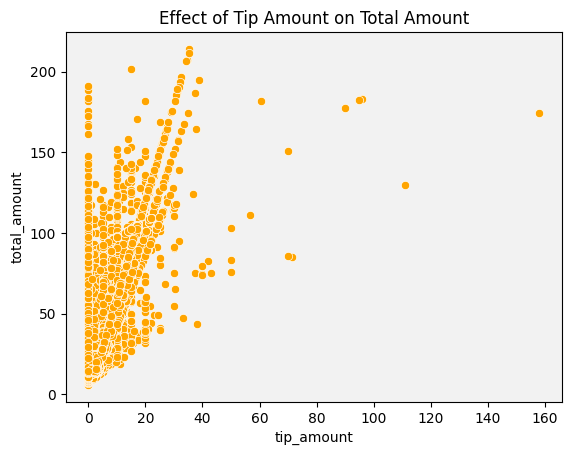

In [252]:
#Assumption of Spearman R - Monotonicity
ax = plt.axes()
sns.scatterplot(x=taxidf1['tip_amount'], y=taxidf1['total_amount'], color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.title('Effect of Tip Amount on Total Amount')
plt.show()

In [ ]:
# assumption of monotonicity is met

<b>Spearman's Rho Test to check dependency of total amount on tip amount</b>

Null Hypothesis = Ho = "Tip amount has no effect on total amount"

Alternate Hypothesis = Ha = "Tip amount has an effect on total amount"

This will be a two-tailed test.

`Significance Level = 0.05`

In [253]:
# Spearman's Rho Test to check dependency of total amount on tip amount
Ho = "Tip Amount has no effect on total amount"   # Stating the Null Hypothesis
Ha = "Tip Amount has an effect on total amount"   # Stating the Alternate Hypothesis

rho_ta, pval_ta = stats.spearmanr(taxidf1['tip_amount'], taxidf1['total_amount'])
# print("p-value : ", pval_ta)

if pval_ta < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_ta.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_ta.round(3)} > 0.05')

Tip Amount has an effect on total amount as the p_value 0.0 < 0.05


<b>Tolls Amount Feature</b>

In [254]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


total_amount = taxidf1['total_amount']
tolls_amount = taxidf1['tolls_amount']

print(stats.shapiro(total_amount))
print(stats.shapiro(tolls_amount))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(total_amount, tolls_amount)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.6719603538513184, pvalue=0.0)
ShapiroResult(statistic=0.27280616760253906, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# As the assumptions of the Pearson R did not meet, proceeding with Spearman R

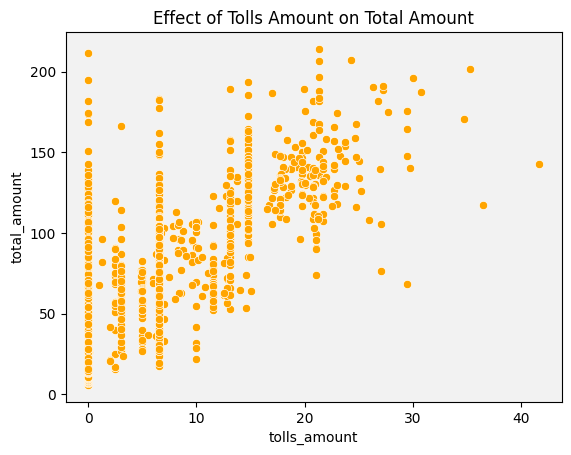

In [255]:
#Assumption of Spearman R - Monotonicity
ax = plt.axes()
sns.scatterplot(x=taxidf1['tolls_amount'], y=taxidf1['total_amount'], color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.title('Effect of Tolls Amount on Total Amount')
plt.show()

In [ ]:
# The assumption of monotonicity satisfies therefore proceeding with Spearman R 

<b>Spearman's Rho Test to check dependency of total amount on tolls amount</b>

Null Hypothesis = Ho = "Tolls amount has no effect on total amount"

Alternate Hypothesis = Ha = "Tolls amount has an effect on total amount"

This will be a two-tailed test.

`Significance Level = 0.05`

In [256]:
# Spearman's Rho Test to check dependency of total amount on tolls amount
Ho = "Tolls amount has no effect on total amount"   # Stating the Null Hypothesis
Ha = "Tolls amount has an effect on total amount"   # Stating the Alternate Hypothesis

rho_ts, pval_ts = stats.spearmanr(taxidf1['tolls_amount'], taxidf1['total_amount'])
# print("p-value : ", pval_ts)

if pval_ts < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_ts.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_ts.round(3)} > 0.05')

Tolls amount has an effect on total amount as the p_value 0.0 < 0.05


<b>Congestion Surcharge Feature</b>

In [257]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'

one = taxidf1[taxidf1.congestion_surcharge == 0]['total_amount']
two = taxidf1[taxidf1.congestion_surcharge == 2.5]['total_amount']


print(stats.shapiro(one))
print(stats.shapiro(two))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one, two)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.9234640598297119, pvalue=0.0)
ShapiroResult(statistic=0.6548035740852356, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
#  assumptions of t test did not meet, testing the assumptions of Manwhitney U

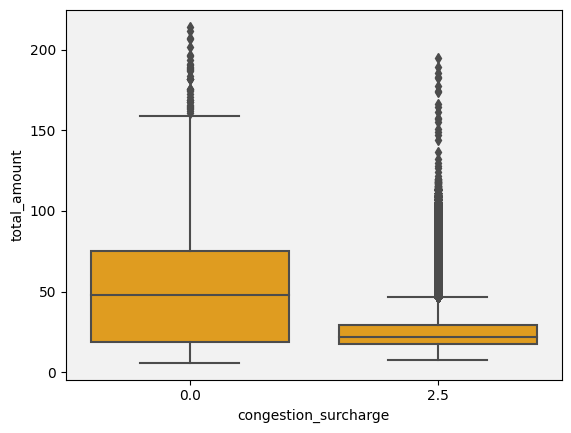

In [258]:
# Mann Whitney U - checking the assumption of similar distributions for groups
ax = plt.axes()
sns.boxplot(x=taxidf1.congestion_surcharge, y=taxidf1.total_amount, color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.show()

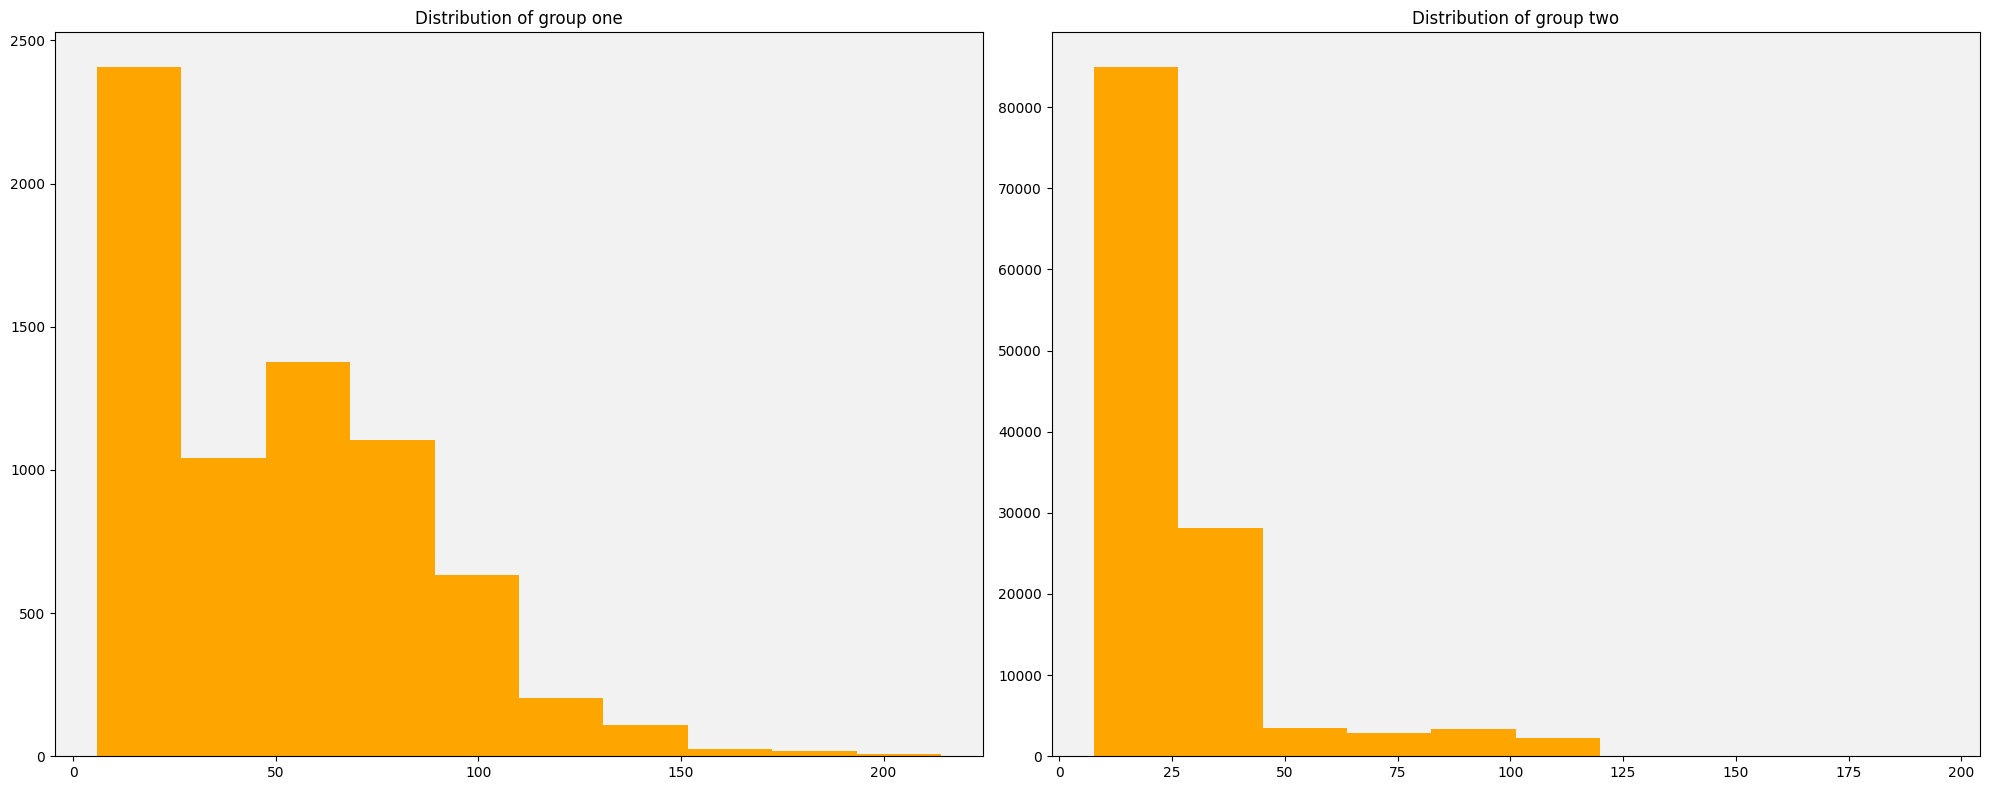

In [259]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(20, 8))

# Plot the histogram for 'one' in the first subplot
plt.subplot(1, 2, 1)
plt.hist(one, color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' in the second subplot
plt.subplot(1, 2, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# the shapes of the distributions are likely similar; proceeding with Mann-whitney U

<b>Mann-Whitney U Test to check dependency of total amount on congestion surcharge</b>

Null Hypothesis = Ho = "Mean total amount is same for both values in congestion surcharge"

Alternate Hypothesis = Ha = "Mean total amount is different for both values in congestion surcharge"

This will be a two-tailed test.

`Significance Level = 0.05`

In [260]:
# Mann-Whitney U Test to check dependency of total amount on congestion surcharge
Ho = "Mean total amount is same for both values in congestion surcharge"   # Stating the Null Hypothesis
Ha = "Mean total amount is different for both values in congestion surcharge"   # Stating the Alternate Hypothesis

one = np.array(taxidf1[taxidf1.congestion_surcharge == 0]['total_amount']) 
two = np.array(taxidf1[taxidf1.congestion_surcharge == 2.5]['total_amount']) 

t_cs, pval_cs  = stats.mannwhitneyu(one, two)
# print('p-value : ', pval_cs)

if pval_cs < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_cs.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_cs.round(3)} > 0.05')

Mean total amount is different for both values in congestion surcharge as the p_value 0.0 < 0.05


<b>Airport Fee Feature</b>

In [261]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'

one = taxidf1[taxidf1.Airport_fee == 0]['total_amount']
two = taxidf1[taxidf1.Airport_fee == 1.75]['total_amount']


print(stats.shapiro(one))
print(stats.shapiro(two))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one, two)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.6607728004455566, pvalue=0.0)
ShapiroResult(statistic=0.957501232624054, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


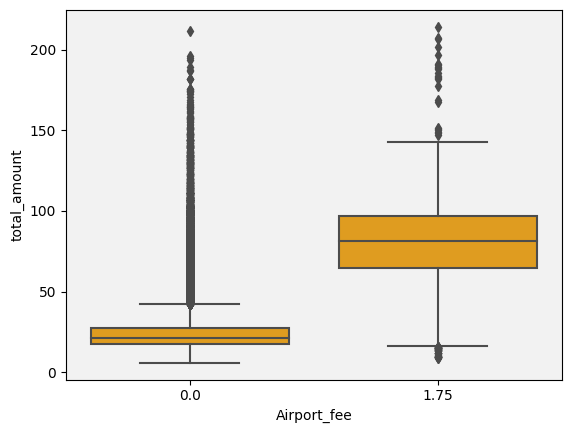

In [262]:
# Mann Whitney U - checking the assumption of similar distributions for groups
ax = plt.axes()
sns.boxplot(x=taxidf1.Airport_fee, y=taxidf1.total_amount, color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.show()

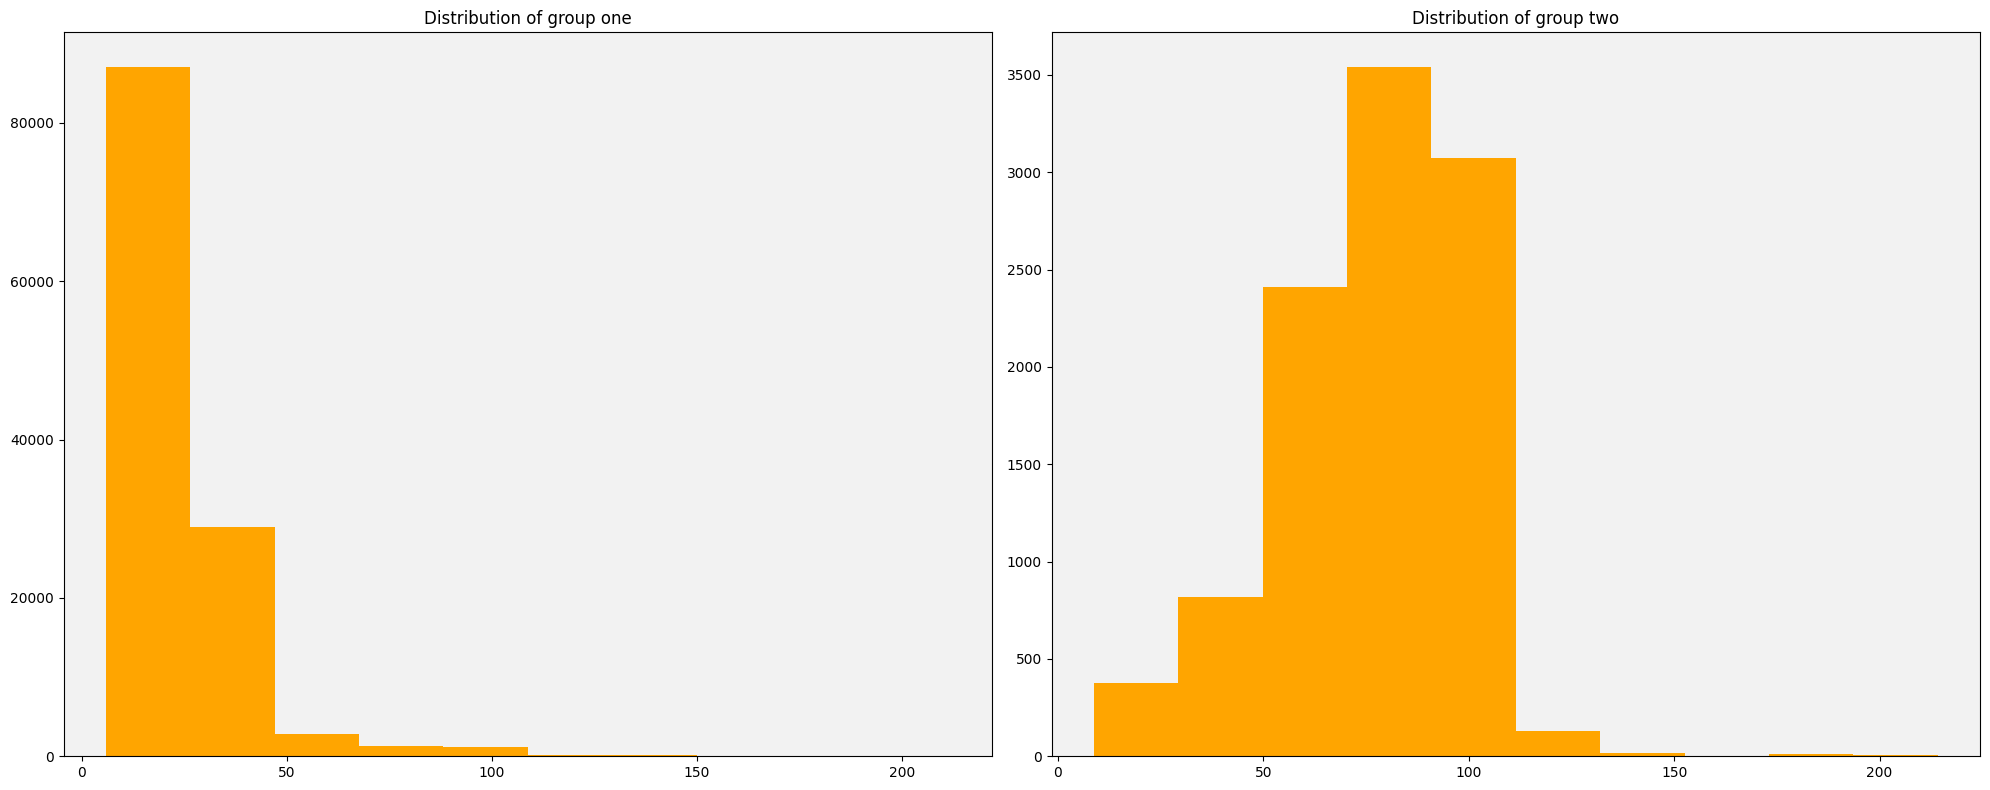

In [263]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(20,8))

# Plot the histogram for 'one' in the first subplot
plt.subplot(1, 2, 1)
plt.hist(one, color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' in the second subplot
plt.subplot(1, 2, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
 # Since the shapes of the distributions are likely similar; proceeding with Mann-whitney U

<b>Mann-Whitney U Test to check dependency of total amount on Airport Fee</b>

Null Hypothesis = Ho = "Mean total amount is same for both values in Airport Fees"

Alternate Hypothesis = Ha = "Mean total amount is different for both values in Airport Fees"

This will be a two-tailed test.

`Significance Level = 0.05`

In [264]:
# Mann-Whitney U Test to check dependency of total amount on airport fees
Ho = "Mean total amount is same for both values in airport fees"   # Stating the Null Hypothesis
Ha = "Mean total amount is different for both values in airport fees"   # Stating the Alternate Hypothesis

one = np.array(taxidf1[taxidf1.Airport_fee == 0]['total_amount']) 
two = np.array(taxidf1[taxidf1.Airport_fee == 1.75]['total_amount']) 

t_af, pval_af  = stats.mannwhitneyu(one, two)
# print('p-value : ', pval_af)

if pval_af < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_af.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_af.round(3)} > 0.05')

Mean total amount is different for both values in airport fees as the p_value 0.0 < 0.05


<b>Trip Duration Seconds Feature</b>

In [265]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


total_amount = taxidf1['total_amount']
trip_duration_secs = taxidf1['trip_duration_secs']

print(stats.shapiro(total_amount))
print(stats.shapiro(trip_duration_secs))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(total_amount, trip_duration_secs)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.6719603538513184, pvalue=0.0)
ShapiroResult(statistic=0.7859742045402527, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# As the assumptions of the Pearson R did not meet, proceeding with Spearman R

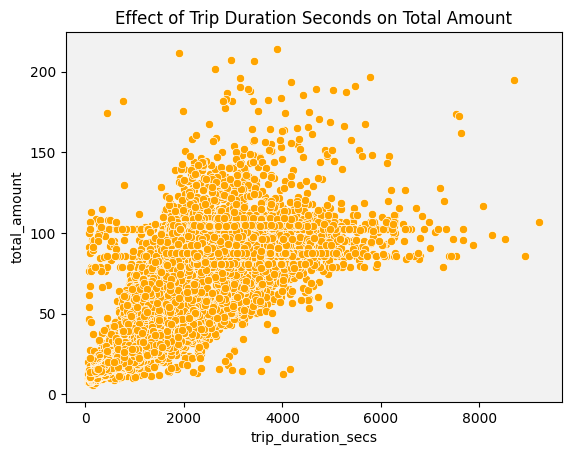

In [266]:
#Assumption of Spearman R - Monotonicity
ax = plt.axes()
sns.scatterplot(x=taxidf1['trip_duration_secs'], y=taxidf1['total_amount'], color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.title('Effect of Trip Duration Seconds on Total Amount')
plt.show()

In [ ]:
# The assumption of monotonicity satisfies; therefore proceeding with Spearman R 

<b>Spearman's Rho Test to check dependency of total amount on trip duration seconds</b>

Null Hypothesis = Ho = "Trip duration seconds has no effect on total amount"

Alternate Hypothesis = Ha = "Trip duration seconds has an effect on total amount"

This will be a two-tailed test.

`Significance Level = 0.05`

In [267]:
# Spearman's Rho Test to check dependency of total amount on trip duration seconds
Ho = "Trip duration seconds has no effect on total amount"   # Stating the Null Hypothesis
Ha = "Trip duration seconds has an effect on total amount"   # Stating the Alternate Hypothesis

rho_tds, pval_tds = stats.spearmanr(taxidf1['trip_duration_secs'], taxidf1['total_amount'])
# print("p-value : ", pval_tds)

if pval_tds < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_tds.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_tds.round(3)} > 0.05')

Trip duration seconds has an effect on total amount as the p_value 0.0 < 0.05


<b>Pickup Hour Feature</b>

In [268]:
#cheking the assumptions for ANOVA

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'

one = taxidf1[taxidf1.pickup_hour == 16]['total_amount']
two = taxidf1[taxidf1.pickup_hour == 17]['total_amount']
three = taxidf1[taxidf1.pickup_hour == 18]['total_amount']
four = taxidf1[taxidf1.pickup_hour == 19]['total_amount']



print(stats.shapiro(one))
print(stats.shapiro(two))
print(stats.shapiro(three))
print(stats.shapiro(four))


#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one,two,three,four)
# print("\nLevene test statistics :", levene_stat)
# print("\nLevene p-value :", levene_pval)

if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.6900337934494019, pvalue=0.0)
ShapiroResult(statistic=0.683856725692749, pvalue=0.0)
ShapiroResult(statistic=0.6535675525665283, pvalue=0.0)
ShapiroResult(statistic=0.6601406335830688, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# Since the assumptions for ANOVA is not satisfied, proceeding with non-parametric test (Kruskal-Wallis H Test).

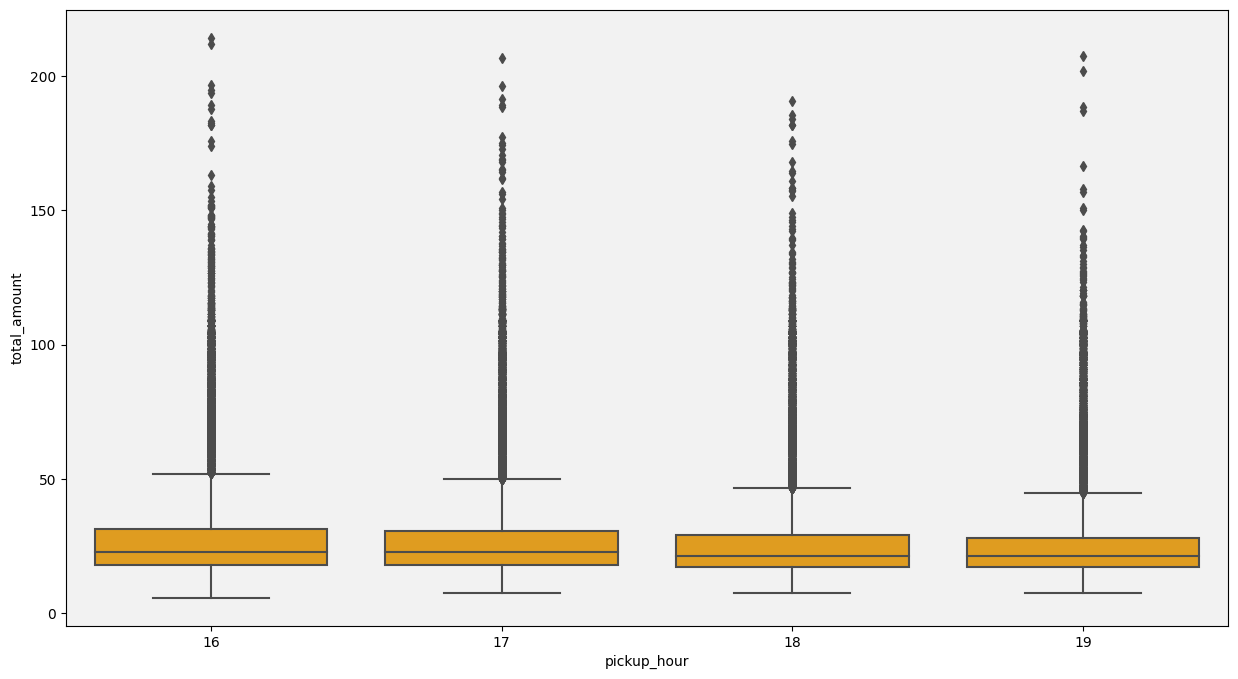

In [269]:
# Kruskal wallis H - checking the assumption of similar distributions for groups
plt.figure(figsize = (15,8))
ax = plt.axes()
ax.set_facecolor("#F2F2F2") 
sns.boxplot(x=taxidf1.pickup_hour, y=taxidf1.total_amount, color = 'orange')
plt.show()

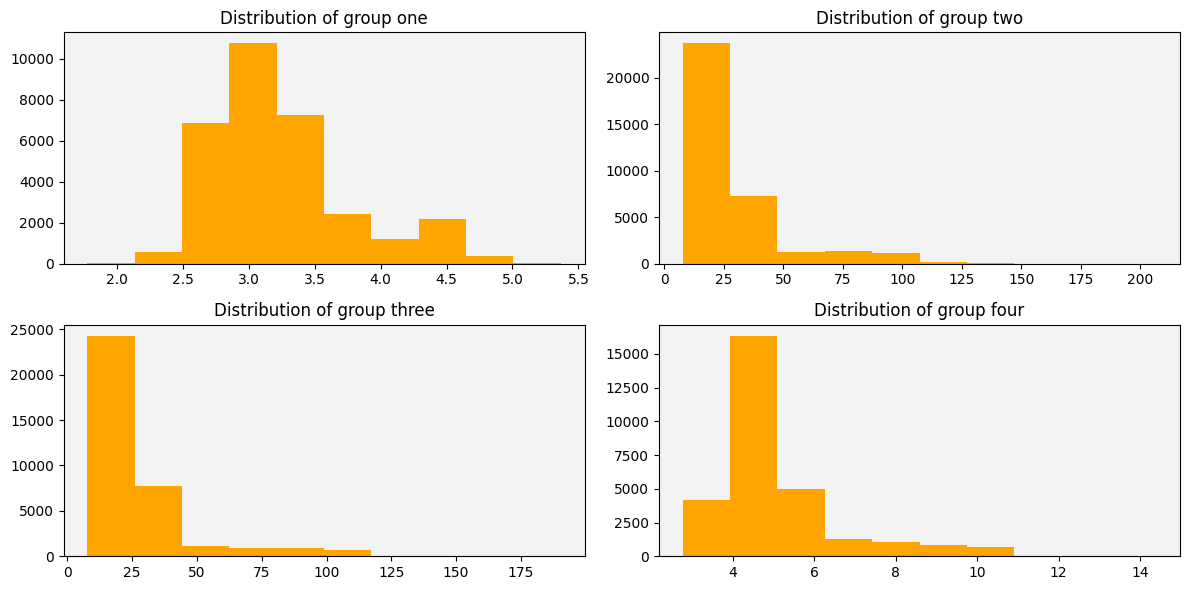

In [271]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# Plot the histogram for 'one' 
plt.subplot(2, 2, 1)
plt.hist(np.log(one), color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' 
plt.subplot(2,2, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'three' 
plt.subplot(2,2, 3)
plt.hist(three, color='orange')
plt.title('Distribution of group three')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'four' 
plt.subplot(2,2, 4)
plt.hist(np.sqrt(four), color='orange')
plt.title('Distribution of group four')
plt.gca().set_facecolor("#F2F2F2")


# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Since the deviations in the distribution is not very high, proceeding with Kruskal wallis h

<b>Kruskal-Wallis H Test to check dependency of total amount on pickup hour</b>

Null Hypothesis = Ho = "Pickup hour has no effect on total amount"

Alternate Hypothesis = Ha = "Pickup hour has an effect on total amount"

`Significance Level = 0.05`

In [272]:
# Kruskal test to check dependency of pickup hour on total amount
Ho = "Pickup Hour has no effect on total amount"   # Stating the Null Hypothesis
Ha = "Pickup Hour has an effect on total amount"   # Stating the Alternate Hypothesis

one = taxidf1[taxidf1.pickup_hour == 16]['total_amount']
two = taxidf1[taxidf1.pickup_hour == 17]['total_amount']
three = taxidf1[taxidf1.pickup_hour == 18]['total_amount']
four = taxidf1[taxidf1.pickup_hour == 19]['total_amount']


f_ph, pval_ph = stats.kruskal(one, two, three, four)
# print('p-value : ', pval_ph)


if pval_ph < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_ph.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_ph.round(3)} > 0.05')

Pickup Hour has an effect on total amount as the p_value 0.0 < 0.05


<b>Drop Hour Feature</b>

In [273]:
#cheking the assumptions for ANOVA

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'

one = taxidf1[taxidf1.drop_hour == 16]['total_amount']
two = taxidf1[taxidf1.drop_hour == 17]['total_amount']
three = taxidf1[taxidf1.drop_hour == 18]['total_amount']
four = taxidf1[taxidf1.drop_hour == 19]['total_amount']
five = taxidf1[taxidf1.drop_hour == 20]['total_amount']
six = taxidf1[taxidf1.drop_hour == 21]['total_amount']




print(stats.shapiro(one))
print(stats.shapiro(two))
print(stats.shapiro(three))
print(stats.shapiro(four))
print(stats.shapiro(five))
print(stats.shapiro(six))


#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one,two,three,four,five,six)
# print("\nLevene test statistics :", levene_stat)
# print("\nLevene p-value :", levene_pval)

if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.6721779704093933, pvalue=0.0)
ShapiroResult(statistic=0.6816446781158447, pvalue=0.0)
ShapiroResult(statistic=0.6693185567855835, pvalue=0.0)
ShapiroResult(statistic=0.6694083213806152, pvalue=0.0)
ShapiroResult(statistic=0.8091264963150024, pvalue=0.0)
ShapiroResult(statistic=0.9999996423721313, pvalue=0.9988566637039185)
Data has unequal variance as the p_value 0.0 < 0.05


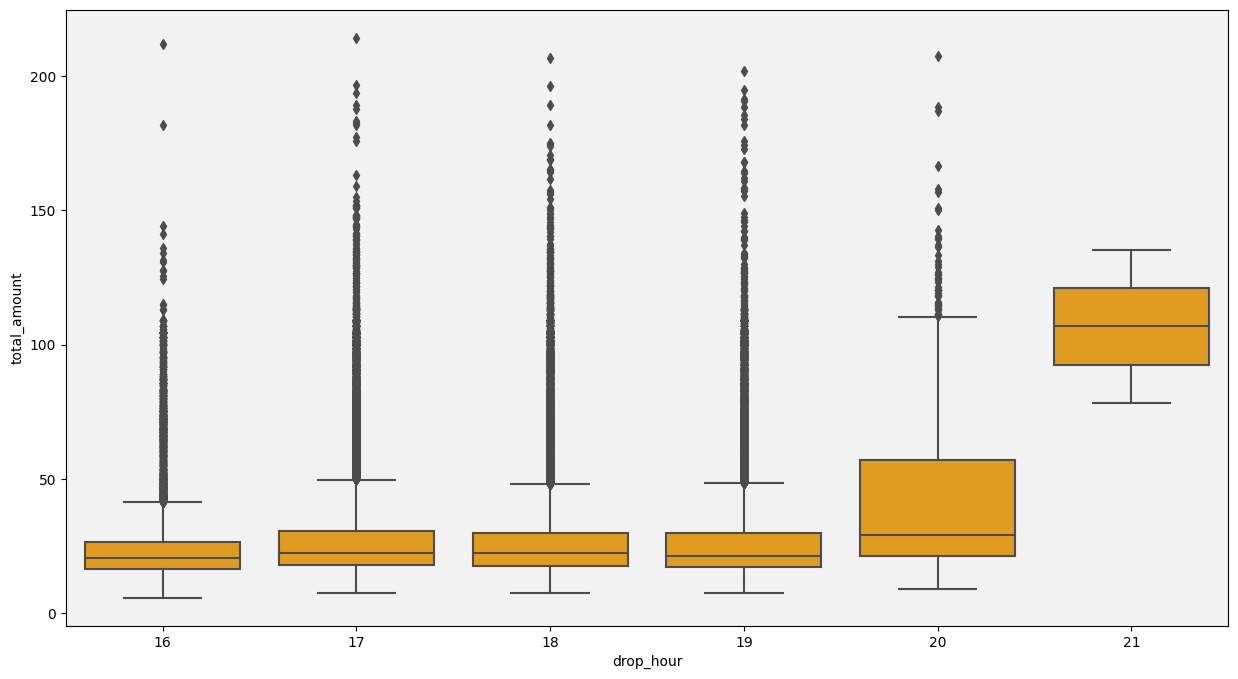

In [274]:
# Kruskal wallis H - checking the assumption of similar distributions for groups
plt.figure(figsize = (15,8))
ax = plt.axes()
ax.set_facecolor("#F2F2F2") 
sns.boxplot(x=taxidf1.drop_hour, y=taxidf1.total_amount, color = 'orange')
plt.show()

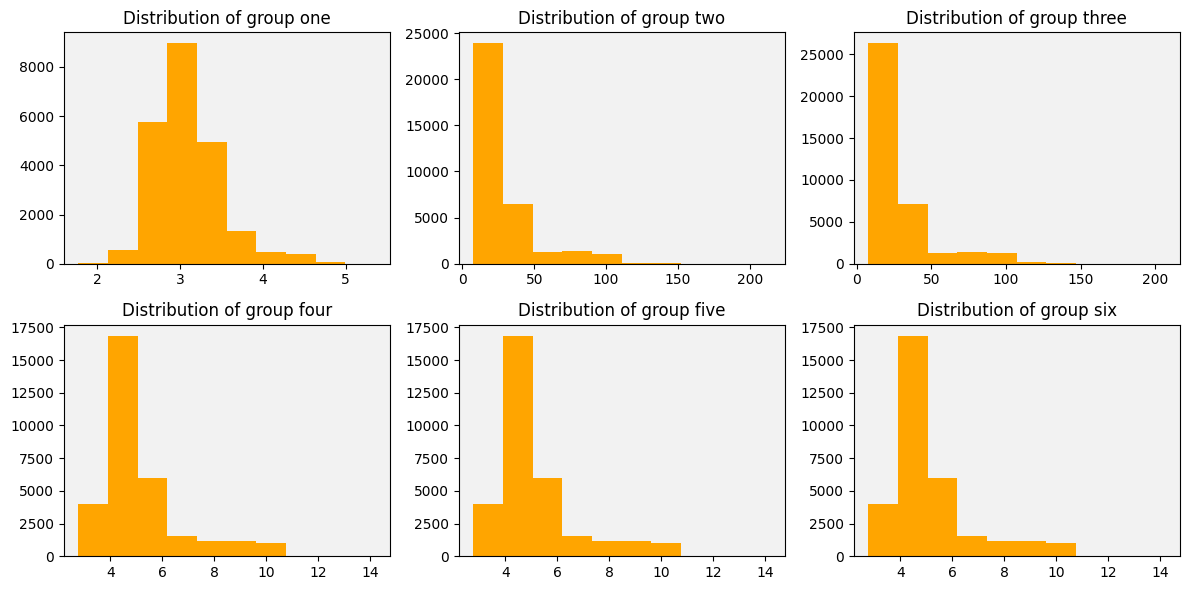

In [275]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# Plot the histogram for 'one' 
plt.subplot(2, 3, 1)
plt.hist(np.log(one), color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' 
plt.subplot(2,3, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'three' 
plt.subplot(2,3, 3)
plt.hist(three, color='orange')
plt.title('Distribution of group three')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'four' 
plt.subplot(2,3, 4)
plt.hist(np.sqrt(four), color='orange')
plt.title('Distribution of group four')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'five' 
plt.subplot(2,3, 5)
plt.hist(np.sqrt(four), color='orange')
plt.title('Distribution of group five')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'six' 
plt.subplot(2,3, 6)
plt.hist(np.sqrt(four), color='orange')
plt.title('Distribution of group six')
plt.gca().set_facecolor("#F2F2F2")


# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Since the deviations in the distribution is not very high, proceeding with Kruskal wallis h

<b>Kruskal-Wallis H Test to check dependency of total amount on Dropoff Hour</b>

Null Hypothesis = Ho = "Dropoff Hour has no effect on total amount"

Alternate Hypothesis = Ha = "Dropoff Hour has an effect on total amount"

`Significance Level = 0.05`

In [276]:
# Kruskal test to check dependency of dropoff hour on total amount
Ho = "Dropoff Hour has no effect on total amount"   # Stating the Null Hypothesis
Ha = "Dropoff Hour has an effect on total amount"   # Stating the Alternate Hypothesis

one = taxidf1[taxidf1.drop_hour == 16]['total_amount']
two = taxidf1[taxidf1.drop_hour == 17]['total_amount']
three = taxidf1[taxidf1.drop_hour == 18]['total_amount']
four = taxidf1[taxidf1.drop_hour == 19]['total_amount']
five = taxidf1[taxidf1.drop_hour == 20]['total_amount']
six = taxidf1[taxidf1.drop_hour == 21]['total_amount']


f_dh, pval_dh = stats.kruskal(one, two, three, four, five, six)
# print('p-value : ', pval_dh)


if pval_dh < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_dh.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_dh.round(3)} > 0.05')

Dropoff Hour has an effect on total amount as the p_value 0.0 < 0.05


<b>Pickup Day Feature</b>

In [277]:
#cheking the assumptions for ANOVA

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'

monday = taxidf1[taxidf1.pickup_day == 'Monday']['total_amount']
tuesday = taxidf1[taxidf1.pickup_day == 'Tuesday']['total_amount']
wednesday = taxidf1[taxidf1.pickup_day == 'Wednesday']['total_amount']
thursday = taxidf1[taxidf1.pickup_day == 'Thursday']['total_amount']
friday = taxidf1[taxidf1.pickup_day == 'Friday']['total_amount']



print(stats.shapiro(monday))
print(stats.shapiro(tuesday))
print(stats.shapiro(wednesday))
print(stats.shapiro(thursday))
print(stats.shapiro(friday))


#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(monday,tuesday,wednesday,thursday,friday)
# print("\nLevene test statistics :", levene_stat)
# print("\nLevene p-value :", levene_pval)

if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.6804157495498657, pvalue=0.0)
ShapiroResult(statistic=0.6525569558143616, pvalue=0.0)
ShapiroResult(statistic=0.6891872882843018, pvalue=0.0)
ShapiroResult(statistic=0.6738983392715454, pvalue=0.0)
ShapiroResult(statistic=0.6599128246307373, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# Since the assumptions for ANOVA is not satisfied, proceeding with non-parametric test (Kruskal-Wallis H Test).

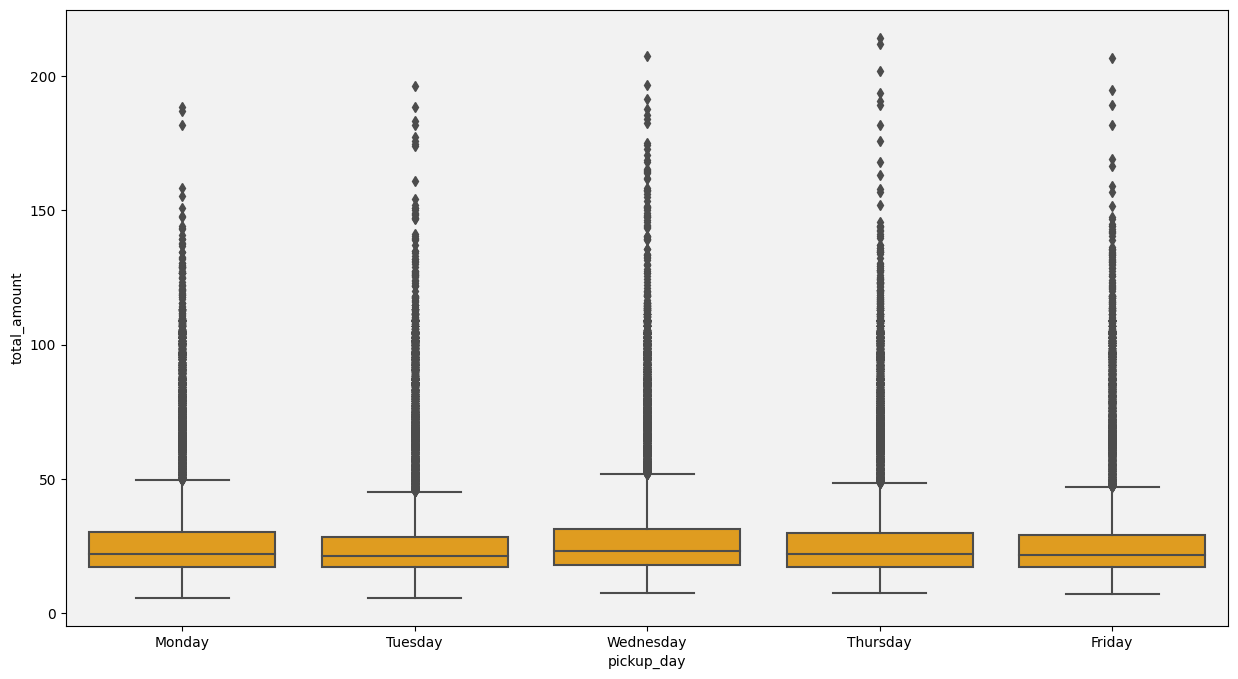

In [278]:
# Kruskal wallis H - checking the assumption of similar distributions for groups
plt.figure(figsize = (15,8))
ax = plt.axes()
ax.set_facecolor("#F2F2F2") 
sns.boxplot(x=taxidf1.pickup_day, y=taxidf1.total_amount, color = 'orange')
plt.show()

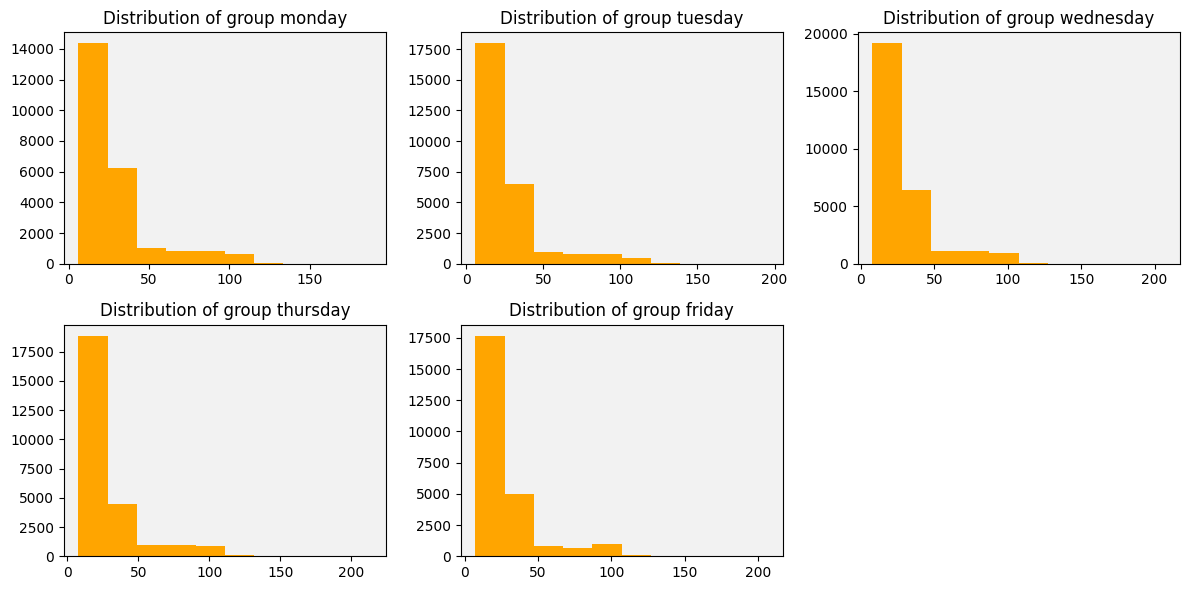

In [279]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# Plot the histogram for 'one' 
plt.subplot(2, 3, 1)
plt.hist(monday, color='orange')
plt.title('Distribution of group monday')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' 
plt.subplot(2,3, 2)
plt.hist(tuesday, color='orange')
plt.title('Distribution of group tuesday')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'three' 
plt.subplot(2,3, 3)
plt.hist(wednesday, color='orange')
plt.title('Distribution of group wednesday')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'four' 
plt.subplot(2,3, 4)
plt.hist(thursday, color='orange')
plt.title('Distribution of group thursday')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'five' 
plt.subplot(2,3, 5)
plt.hist(friday, color='orange')
plt.title('Distribution of group friday')
plt.gca().set_facecolor("#F2F2F2")

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Since the deviations in the distribution is not very high, proceeding with Kruskal wallis h

<b>Kruskal-Wallis H Test to check dependency of total amount on Pickup Day</b>

Null Hypothesis = Ho = "Pickup day has no effect on total amount"

Alternate Hypothesis = Ha = "Pickup has an effect on total amount"

`Significance Level = 0.05`

In [280]:
# Kruskal test to check dependency of pickup day on total amount
Ho = "Pickup day has no effect on total amount"    # Stating the Null Hypothesis
Ha = "Pickup has an effect on total amount"   # Stating the Alternate Hypothesis

monday = taxidf1[taxidf1.pickup_day == 'Monday']['total_amount']
tuesday = taxidf1[taxidf1.pickup_day == 'Tuesday']['total_amount']
wednesday = taxidf1[taxidf1.pickup_day == 'Wednesday']['total_amount']
thursday = taxidf1[taxidf1.pickup_day == 'Thursday']['total_amount']
friday = taxidf1[taxidf1.pickup_day == 'Friday']['total_amount']


f_pd, pval_pd = stats.kruskal(monday, tuesday, wednesday, thursday, friday)
# print('p-value : ', pval_pd)


if pval_pd < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_pd.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_pd.round(3)} > 0.05')

Pickup has an effect on total amount as the p_value 0.0 < 0.05


<b>Drop-off Day Feature</b>

In [281]:
#cheking the assumptions for ANOVA

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'

monday = taxidf1[taxidf1.dropoff_day == 'Monday']['total_amount']
tuesday = taxidf1[taxidf1.dropoff_day == 'Tuesday']['total_amount']
wednesday = taxidf1[taxidf1.dropoff_day == 'Wednesday']['total_amount']
thursday = taxidf1[taxidf1.dropoff_day == 'Thursday']['total_amount']
friday = taxidf1[taxidf1.dropoff_day == 'Friday']['total_amount']



print(stats.shapiro(monday))
print(stats.shapiro(tuesday))
print(stats.shapiro(wednesday))
print(stats.shapiro(thursday))
print(stats.shapiro(friday))


#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(monday,tuesday,wednesday,thursday,friday)
# print("\nLevene test statistics :", levene_stat)
# print("\nLevene p-value :", levene_pval)

if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.6804157495498657, pvalue=0.0)
ShapiroResult(statistic=0.6525569558143616, pvalue=0.0)
ShapiroResult(statistic=0.6891872882843018, pvalue=0.0)
ShapiroResult(statistic=0.6738983392715454, pvalue=0.0)
ShapiroResult(statistic=0.6599128246307373, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# Since the assumptions for ANOVA is not satisfied, proceeding with non-parametric test (Kruskal-Wallis H Test).

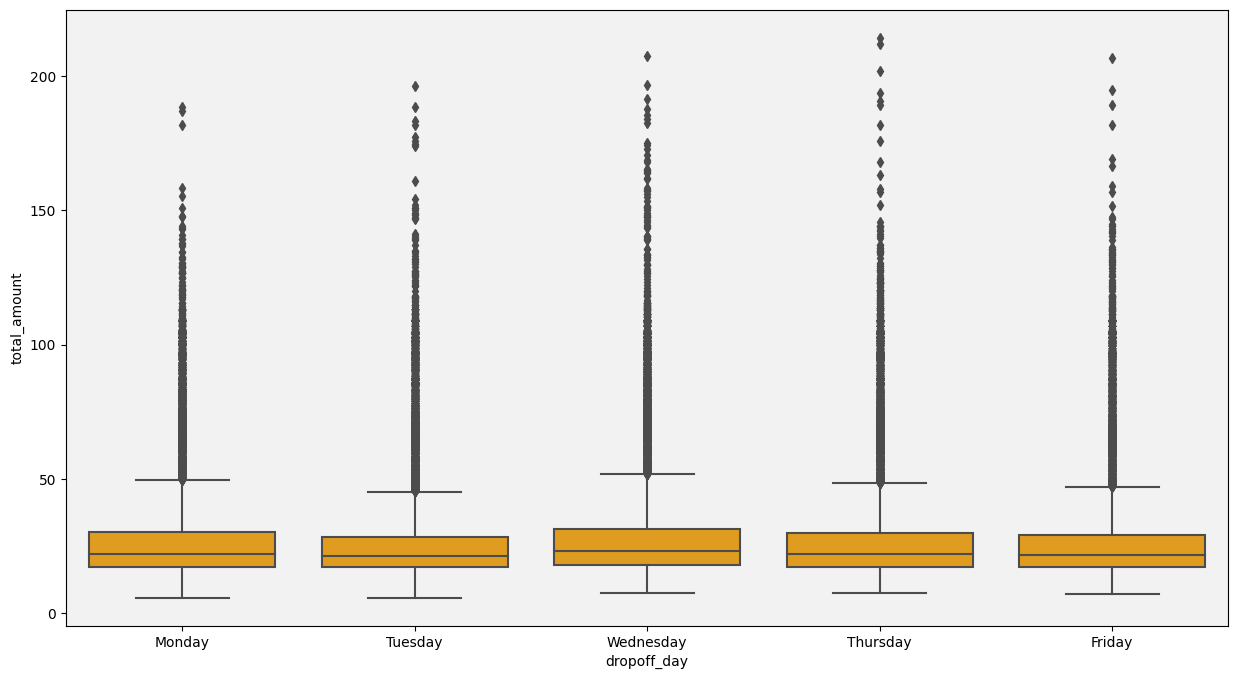

In [282]:
# Kruskal wallis H - checking the assumption of similar distributions for groups
plt.figure(figsize = (15,8))
ax = plt.axes()
ax.set_facecolor("#F2F2F2") 
sns.boxplot(x=taxidf1.dropoff_day, y=taxidf1.total_amount, color = 'orange')
plt.show()

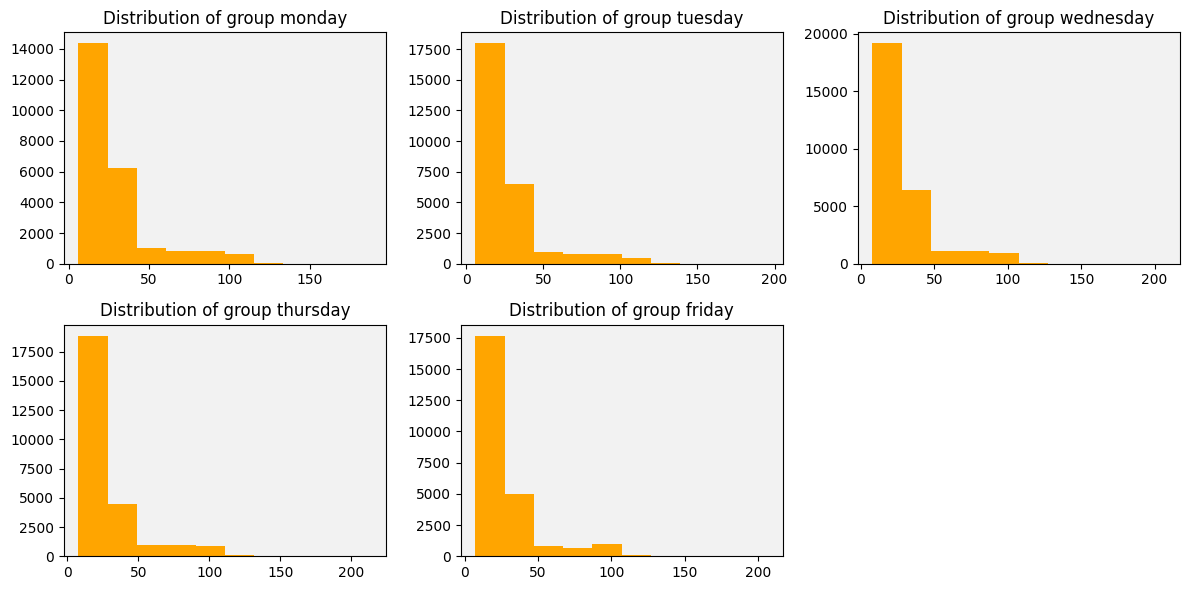

In [283]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# Plot the histogram for 'one' 
plt.subplot(2, 3, 1)
plt.hist(monday, color='orange')
plt.title('Distribution of group monday')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' 
plt.subplot(2,3, 2)
plt.hist(tuesday, color='orange')
plt.title('Distribution of group tuesday')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'three' 
plt.subplot(2,3, 3)
plt.hist(wednesday, color='orange')
plt.title('Distribution of group wednesday')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'four' 
plt.subplot(2,3, 4)
plt.hist(thursday, color='orange')
plt.title('Distribution of group thursday')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'five' 
plt.subplot(2,3, 5)
plt.hist(friday, color='orange')
plt.title('Distribution of group friday')
plt.gca().set_facecolor("#F2F2F2")

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Since the deviations in the distribution is not very high, proceeding with Kruskal wallis h

<b>Kruskal-Wallis H Test to check dependency of total amount on Dropoff day</b>

Null Hypothesis = Ho = "Dropoff day has no effect on total amount"

Alternate Hypothesis = Ha = "Dropoff day has an effect on total amount"

`Significance Level = 0.05`

In [284]:
# Kruskal test to check dependency of dropoff day on total amount
Ho =  "Dropoff day has no effect on total amount"   # Stating the Null Hypothesis
Ha =  "Dropoff day has an effect on total amount"   # Stating the Alternate Hypothesis

monday = taxidf1[taxidf1.dropoff_day == 'Monday']['total_amount']
tuesday = taxidf1[taxidf1.dropoff_day == 'Tuesday']['total_amount']
wednesday = taxidf1[taxidf1.dropoff_day == 'Wednesday']['total_amount']
thursday = taxidf1[taxidf1.dropoff_day == 'Thursday']['total_amount']
friday = taxidf1[taxidf1.dropoff_day == 'Friday']['total_amount']


f_dd, pval_dd = stats.kruskal(monday, tuesday, wednesday, thursday, friday)
# print('p-value : ', pval_dd)


if pval_dd < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_dd.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_dd.round(3)} > 0.05')

Dropoff day has an effect on total amount as the p_value 0.0 < 0.05


In [ ]:
# From the statistical analysis, it can be seen that al features were found to be significant for predicting the total amount
# Though, it is not possible, the results might be due to the presence of outliers (16k rows)
# Since, we chose to keep the outliers as it is natural to have outlier in a real life data; 
# we can conclude that the statistical test results are not reliable as it is influenced by presence of outliers.

<b>To identify the significant features that has an effect on predicting the trip duration.</b>

In [285]:
# date time dtype conversion
taxidf1['tpep_pickup_datetime'] = pd.to_datetime(taxidf1['tpep_pickup_datetime'])
taxidf1['tpep_dropoff_datetime'] = pd.to_datetime(taxidf1['tpep_dropoff_datetime'])

In [286]:
# create a new feature trip_duration in mins
taxidf1['trip_duration_mins'] = round((taxidf1['tpep_dropoff_datetime'] - taxidf1['tpep_pickup_datetime']).dt.total_seconds()/60, 1)

taxidf1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_duration_secs,pickup_date,dropoff_date,pickup_hour,drop_hour,pickup_day,dropoff_day,trip_duration_mins
0,2,2023-04-03 16:00:05,2023-04-03 16:10:40,1,1.41,1.0,N,162,137,2,11.4,0.0,0.5,0.0,0.0,1.0,15.4,2.5,0.0,Manhattan,Midtown East,Yellow Zone,Manhattan,Kips Bay,Yellow Zone,635.0,2023-04-03,2023-04-03,16,16,Monday,Monday,10.6
1,2,2023-04-03 16:44:51,2023-04-03 16:49:59,1,0.78,1.0,N,43,230,2,6.5,0.0,0.5,0.0,0.0,1.0,10.5,2.5,0.0,Manhattan,Central Park,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone,308.0,2023-04-03,2023-04-03,16,16,Monday,Monday,5.1
2,2,2023-04-03 16:00:26,2023-04-03 16:14:36,1,1.89,1.0,N,75,237,2,14.9,0.0,0.5,0.0,0.0,1.0,18.9,2.5,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,Upper East Side South,Yellow Zone,850.0,2023-04-03,2023-04-03,16,16,Monday,Monday,14.2
3,2,2023-04-03 16:00:13,2023-04-03 16:09:27,5,2.00,1.0,N,238,166,1,11.4,0.0,0.5,1.0,0.0,1.0,16.4,2.5,0.0,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Morningside Heights,Boro Zone,554.0,2023-04-03,2023-04-03,16,16,Monday,Monday,9.2
4,2,2023-04-03 16:01:17,2023-04-03 16:14:46,1,2.19,1.0,N,229,234,1,14.2,0.0,0.5,1.0,0.0,1.0,19.2,2.5,0.0,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Union Sq,Yellow Zone,809.0,2023-04-03,2023-04-03,16,16,Monday,Monday,13.5


In [287]:
# since the minute column is created, secs column can be removed as it will have strong correlation with the minutes column.

taxidf1.drop(columns = 'trip_duration_secs', inplace  = True )

<b>Vendor ID Feature</b>

In [288]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


one = taxidf1[taxidf1.VendorID == 1]['trip_duration_mins']
two = taxidf1[taxidf1.VendorID == 2]['trip_duration_mins']

print(stats.shapiro(one))
print(stats.shapiro(two))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one, two)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.7770637273788452, pvalue=0.0)
ShapiroResult(statistic=0.788927435874939, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [164]:
# Since the assumptions did not satisfy, lets proceed with non-parameteric test

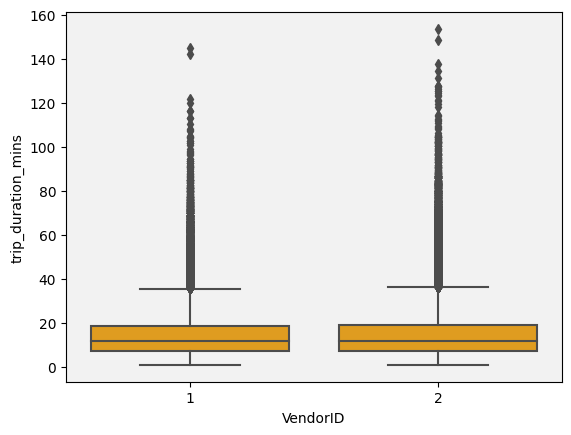

In [289]:
# Mann Whitney U - checking the assumption of similar distributions for groups
ax = plt.axes()
sns.boxplot(x=taxidf1.VendorID, y=taxidf1.trip_duration_mins, color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.show()

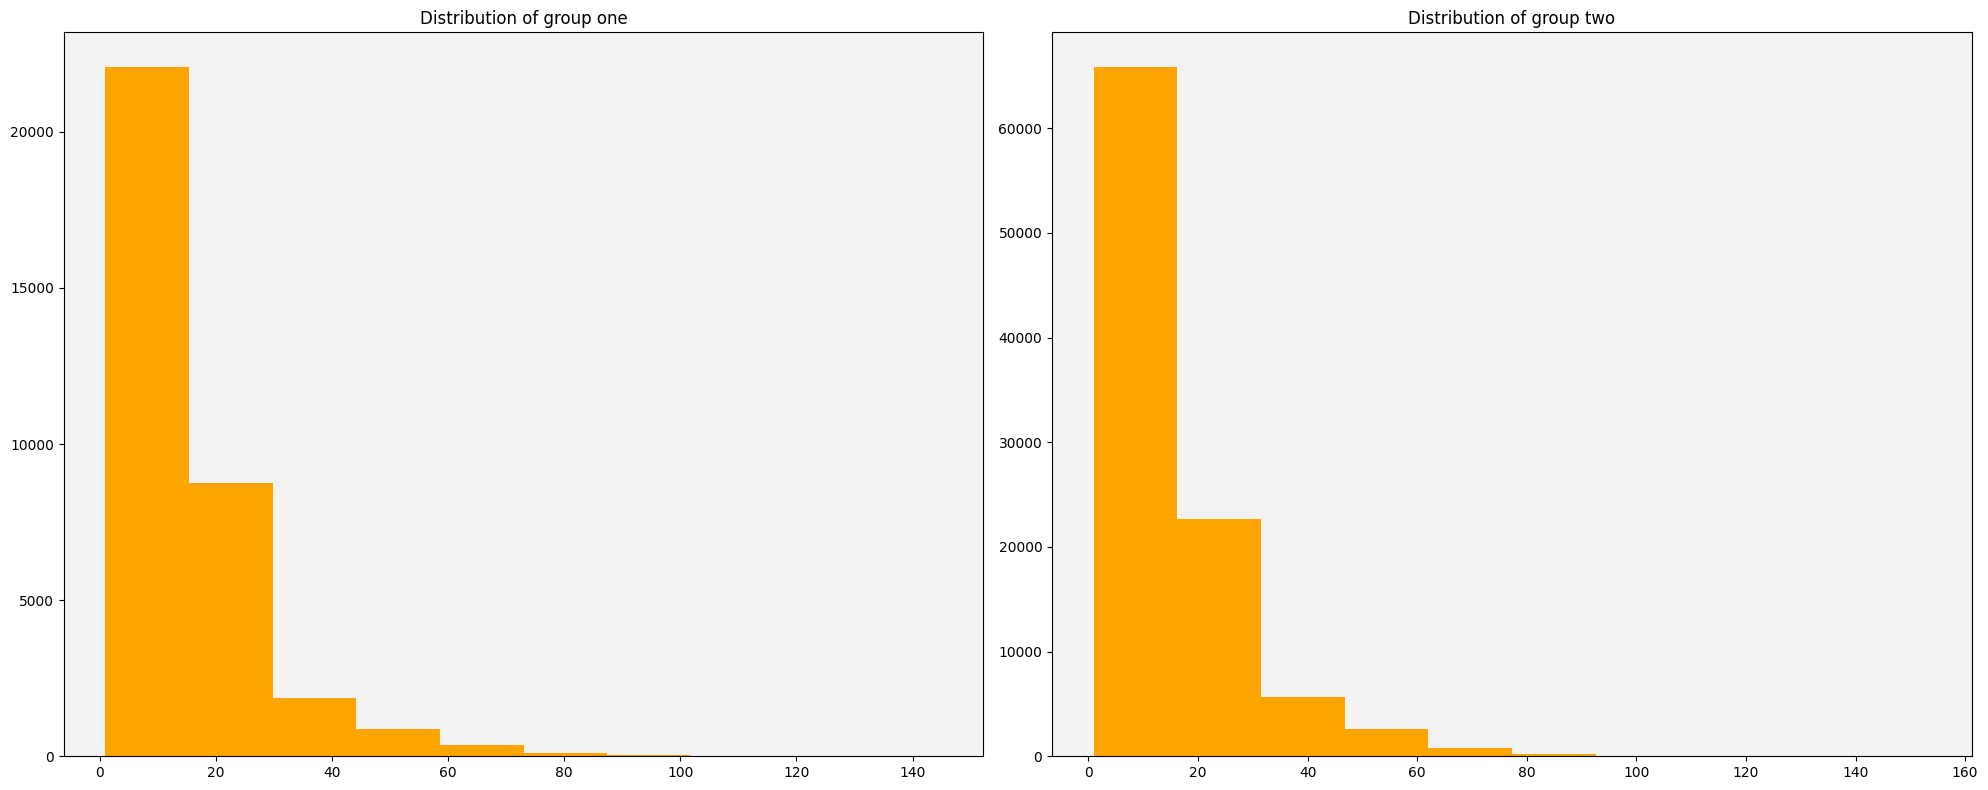

In [290]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(20,8))

# Plot the histogram for 'one' in the first subplot
plt.subplot(1, 2, 1)
plt.hist(one, color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' in the second subplot
plt.subplot(1, 2, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Since the distributions are most likely similar; lets proceed with mann whitney U test

<b>Mann-Whitney U Test to check dependency of trip duration on vendor ID</b>

Null Hypothesis = Ho = "Mean trip duration of vendor ID 1 is same as that of vendor ID 2" 

Alternate Hypothesis = Ha = "Mean trip duration of vendor ID 1 is different from vendor ID 2"  

This will be a two-tailed test.

`Significance Level = 0.05`

In [291]:
# Mann-Whitney U Test to check dependency of trip duration on vendor ID
Ho = "Mean trip duration of vendor ID 1 is same as that of vendor ID 2"   # Stating the Null Hypothesis
Ha = "Mean trip duration of vendor ID 1 is different from vendor ID 2"   # Stating the Alternate Hypothesis

t_vi, pval_vi  = stats.mannwhitneyu(one, two)  
# print('p-value : ', pval_vi)

if pval_vi < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_vi.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_vi.round(3)} > 0.05')

Mean trip duration of vendor ID 1 is same as that of vendor ID 2 as the p_value 0.308 > 0.05


<b>Passenger Count Feature</b>

In [292]:
#cheking the assumptions for ANOVA

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


one = taxidf1[taxidf1.passenger_count == 1]['trip_duration_mins']
two = taxidf1[taxidf1.passenger_count == 2]['trip_duration_mins']
three = taxidf1[taxidf1.passenger_count == 3]['trip_duration_mins']
four = taxidf1[taxidf1.passenger_count == 4]['trip_duration_mins']
five = taxidf1[taxidf1.passenger_count == 5]['trip_duration_mins']
six = taxidf1[taxidf1.passenger_count == 6]['trip_duration_mins']

print(stats.shapiro(one))
print(stats.shapiro(two))
print(stats.shapiro(three))
print(stats.shapiro(four))
print(stats.shapiro(five))
print(stats.shapiro(six))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one, two, three, four, five, six)
# print("\nLevene test statistics :", levene_stat)
# print("\nLevene p-value :", levene_pval)

if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.7874293327331543, pvalue=0.0)
ShapiroResult(statistic=0.793420135974884, pvalue=0.0)
ShapiroResult(statistic=0.8002480864524841, pvalue=0.0)
ShapiroResult(statistic=0.8254677653312683, pvalue=0.0)
ShapiroResult(statistic=0.7692570090293884, pvalue=3.0688436368713494e-43)
ShapiroResult(statistic=0.7941375970840454, pvalue=3.933185271574662e-34)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# since the assumptions did not satisfy; proceeding with non-parametric test

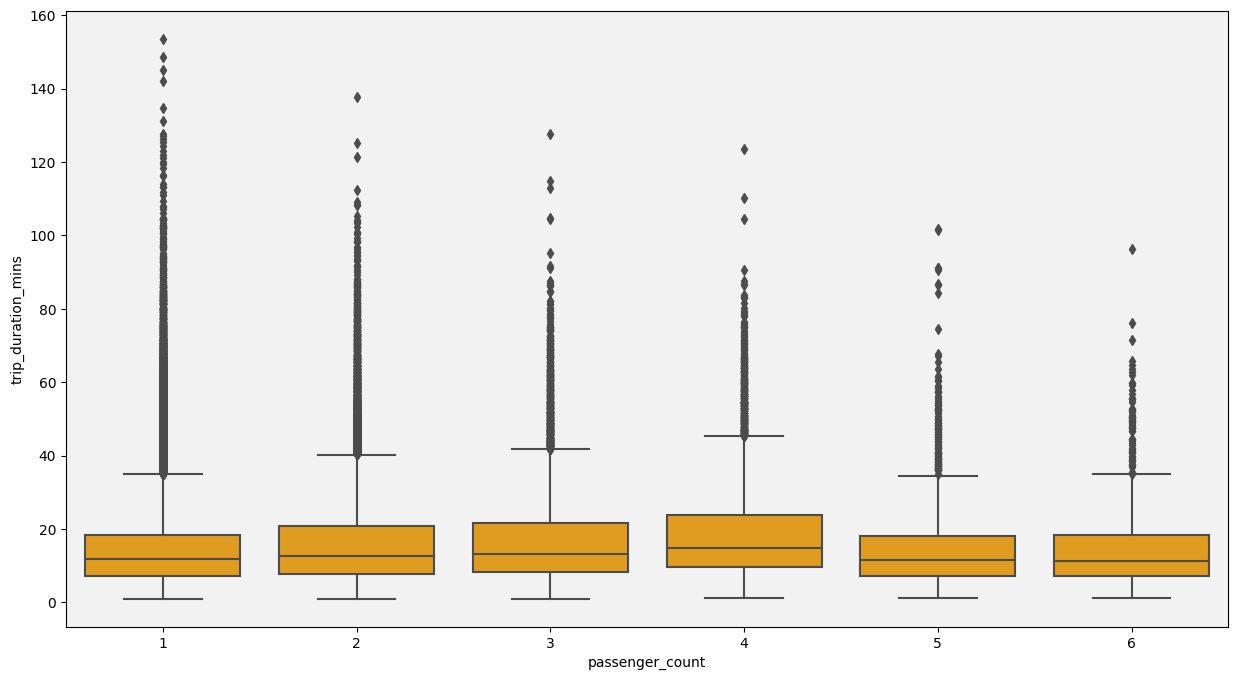

In [293]:
# Kruskal wallis H - checking the assumption of similar distributions for groups
plt.figure(figsize = (15,8))
ax = plt.axes()
ax.set_facecolor("#F2F2F2") 
sns.boxplot(x=taxidf1.passenger_count, y=taxidf1.trip_duration_mins, color = 'orange')
plt.show()

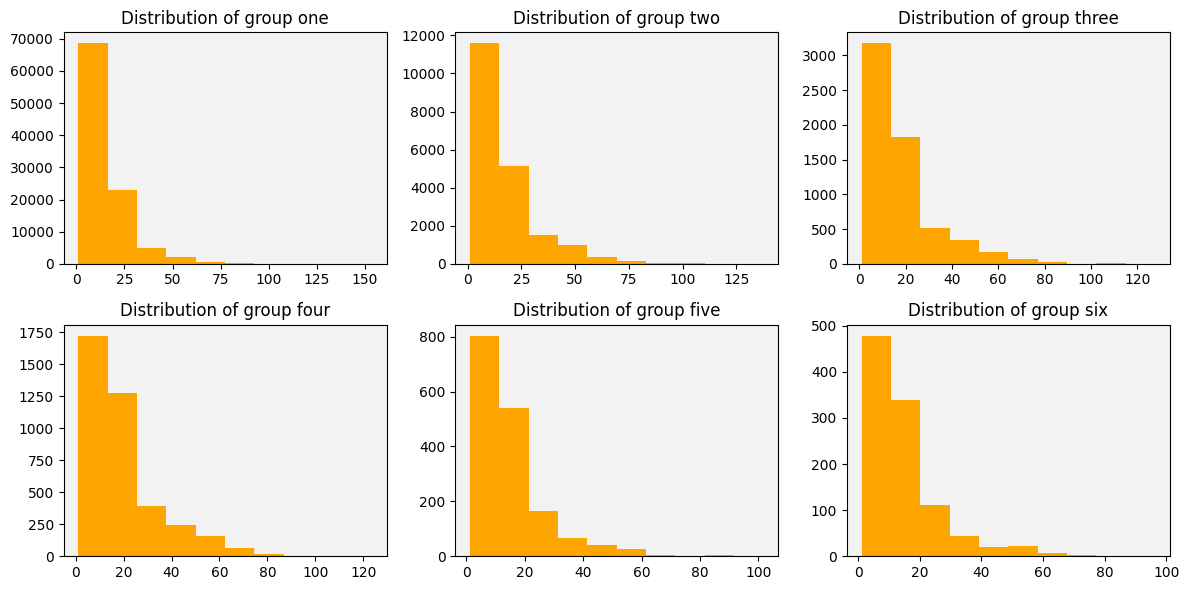

In [169]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# Plot the histogram for 'one' 
plt.subplot(2, 3, 1)
plt.hist(one, color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' 
plt.subplot(2,3, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'three' 
plt.subplot(2,3, 3)
plt.hist(three, color='orange')
plt.title('Distribution of group three')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'four' 
plt.subplot(2,3, 4)
plt.hist(four, color='orange')
plt.title('Distribution of group four')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'five' 
plt.subplot(2,3, 5)
plt.hist(five, color='orange')
plt.title('Distribution of group five')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'six' 
plt.subplot(2,3, 6)
plt.hist(six, color='orange')
plt.title('Distribution of group six')
plt.gca().set_facecolor("#F2F2F2")


# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# since the distributions are similar; proceeding with kruskal test

<b>Kruskal-Wallis H Test to check dependency of trip_duration_mins on passenger count </b>

Null Hypothesis = Ho = "Passenger count has no effect on trip_duration_mins" 

Alternate Hypothesis = Ha = "Passenger count has an effect on trip_duration_mins"  


`Significance Level = 0.05`

In [294]:
# Kruskal test to check dependency of passenger on trip duration
Ho = "No. of passenger has no effect on trip duration"   # Stating the Null Hypothesis
Ha = "No. of passenger has an effect on trip duration"   # Stating the Alternate Hypothesis

f_pc, pval_pc = stats.kruskal(one, two, three, four, five, six)
# print('p-value : ', pval_pc)

print(pval_pc)

if pval_pc < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_pc.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_pc.round(3)} > 0.05')

1.065086176713747e-176
No. of passenger has an effect on trip duration as the p_value 0.0 < 0.05


<b>RatecodeID Feature</b>

In [295]:
#cheking the assumptions for ANOVA

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


one = taxidf1[taxidf1.RatecodeID == 1]['trip_duration_mins']
two = taxidf1[taxidf1.RatecodeID == 2]['trip_duration_mins']
three = taxidf1[taxidf1.RatecodeID == 3]['trip_duration_mins']
four = taxidf1[taxidf1.RatecodeID == 4]['trip_duration_mins']
five = taxidf1[taxidf1.RatecodeID == 5]['trip_duration_mins']


print(stats.shapiro((1/one)))
print(stats.shapiro(two))
print(stats.shapiro(three))
print(stats.shapiro(four))
print(stats.shapiro(five))

#only one group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one, two, three, four, five)
# print("\nLevene test statistics :", levene_stat)
# print("\nLevene p-value :", levene_pval)

if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.7558420300483704, pvalue=0.0)
ShapiroResult(statistic=0.9422250986099243, pvalue=2.703104737682572e-42)
ShapiroResult(statistic=0.9420480132102966, pvalue=5.312802642265524e-09)
ShapiroResult(statistic=0.905703604221344, pvalue=0.07229169458150864)
ShapiroResult(statistic=0.9023374915122986, pvalue=3.385544550837949e-05)
Data has unequal variance as the p_value 0.0 < 0.05


In [132]:
# since the assumptions did not satisfy; proceeding with non-parametric test

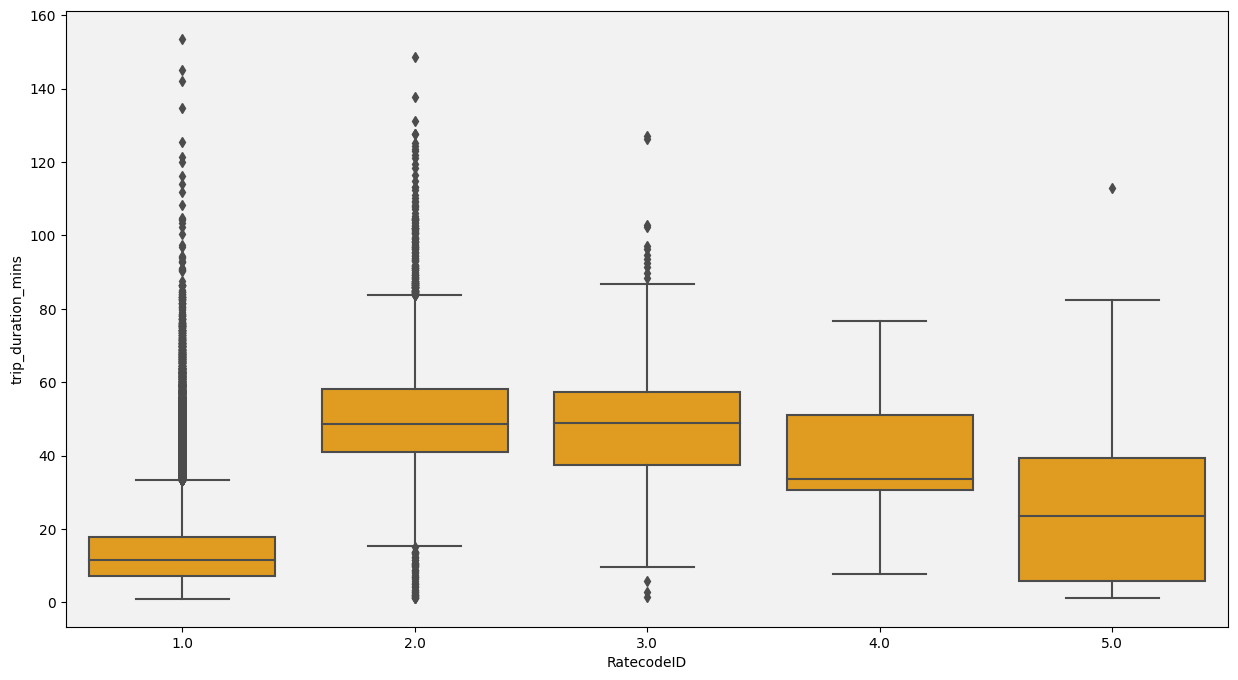

In [296]:
# Kruskal wallis H - checking the assumption of similar distributions for groups
plt.figure(figsize = (15,8))
ax = plt.axes()
ax.set_facecolor("#F2F2F2") 
sns.boxplot(x=taxidf1.RatecodeID, y=taxidf1.trip_duration_mins, color = 'orange')
plt.show()

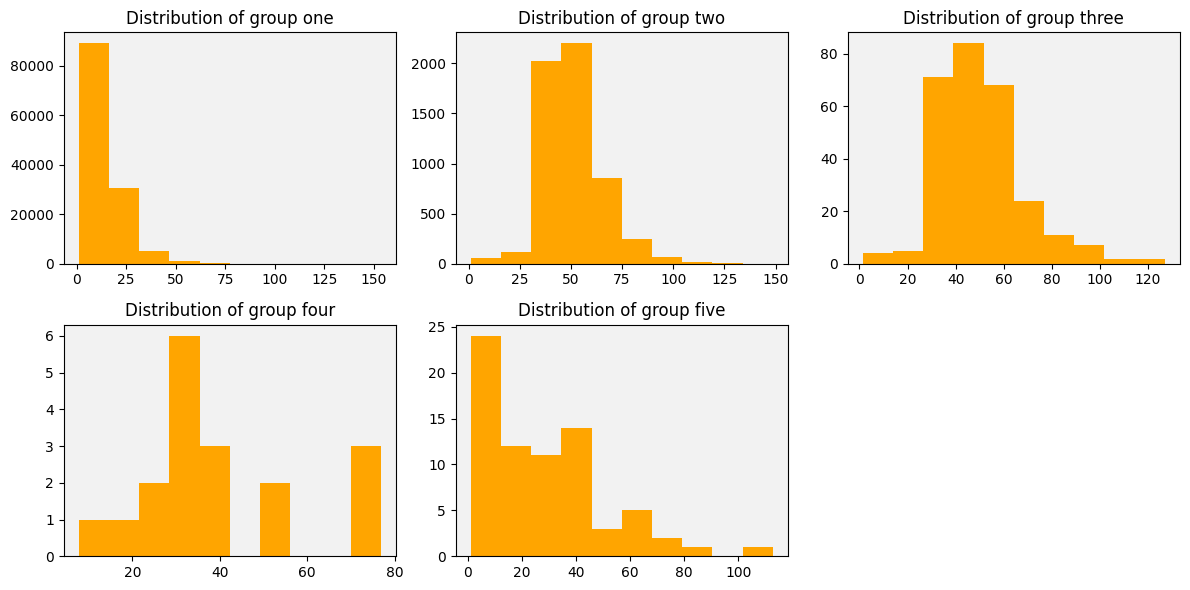

In [297]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# Plot the histogram for 'one' 
plt.subplot(2, 3, 1)
plt.hist(one, color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' 
plt.subplot(2,3, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'three' 
plt.subplot(2,3, 3)
plt.hist(three, color='orange')
plt.title('Distribution of group three')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'four' 
plt.subplot(2,3, 4)
plt.hist(four, color='orange')
plt.title('Distribution of group four')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'five' 
plt.subplot(2,3, 5)
plt.hist(five, color='orange')
plt.title('Distribution of group five')
plt.gca().set_facecolor("#F2F2F2")


# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# since the distributions are likely similar; proceeding with kruskal test

<b>Kruskal-Wallis H Test to check dependency of trip_duration_mins on ratecodeID </b>

Null Hypothesis = Ho = "Rate Code ID has no effect on trip_duration_mins" 

Alternate Hypothesis = Ha = "Rate Code ID has an effect on trip_duration_mins"  


`Significance Level = 0.05`

In [298]:
# # Kruskal test to check dependency of passenger on trip duration
Ho = "RateCode ID has no effect on trip_duration_mins"   # Stating the Null Hypothesis
Ha = "RateCode ID has an effect on trip_duration_mins"   # Stating the Alternate Hypothesis

one = np.log(taxidf1[taxidf1.RatecodeID == 1]['trip_duration_mins'])
two = taxidf1[taxidf1.RatecodeID == 2]['trip_duration_mins']
three = taxidf1[taxidf1.RatecodeID == 3]['trip_duration_mins']
four = np.sqrt(taxidf1[taxidf1.RatecodeID == 4]['trip_duration_mins'])
five = np.sqrt(taxidf1[taxidf1.RatecodeID == 5]['trip_duration_mins'])



f_ri, pval_ri = stats.kruskal(one, two, three, four, five)
# print('p-value : ', pval_ri)

if pval_ri < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({pval_ri.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({pval_ri.round(3)}) > 0.05')

RateCode ID has an effect on trip_duration_mins as the p_value (0.0) < 0.05


<b>Store and Fwd Flag Feature</b>

In [299]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


one = taxidf1[taxidf1.store_and_fwd_flag == 'Y']['trip_duration_mins']
two = taxidf1[taxidf1.store_and_fwd_flag == 'N']['trip_duration_mins']

print(stats.shapiro(one))
print(stats.shapiro(two))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one, two)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.8271065950393677, pvalue=1.478166208348451e-25)
ShapiroResult(statistic=0.7859052419662476, pvalue=0.0)
Data has unequal variance as the p_value 0.026 < 0.05


In [177]:
# since the assumptions did not satisfy; proceeding with non-parametric test

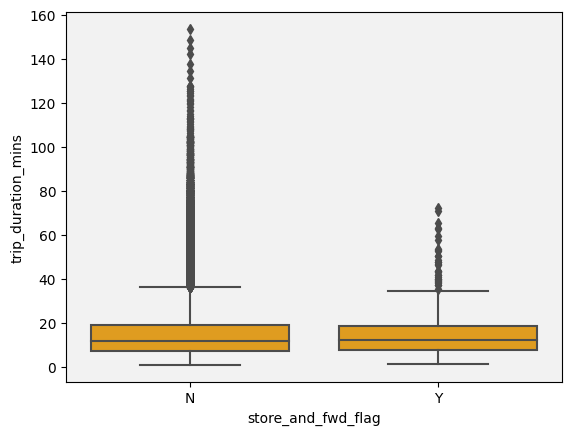

In [300]:
# Mann Whitney U - checking the assumption of similar distributions for groups
ax = plt.axes()
sns.boxplot(x=taxidf1.store_and_fwd_flag, y=taxidf1.trip_duration_mins, color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.show()

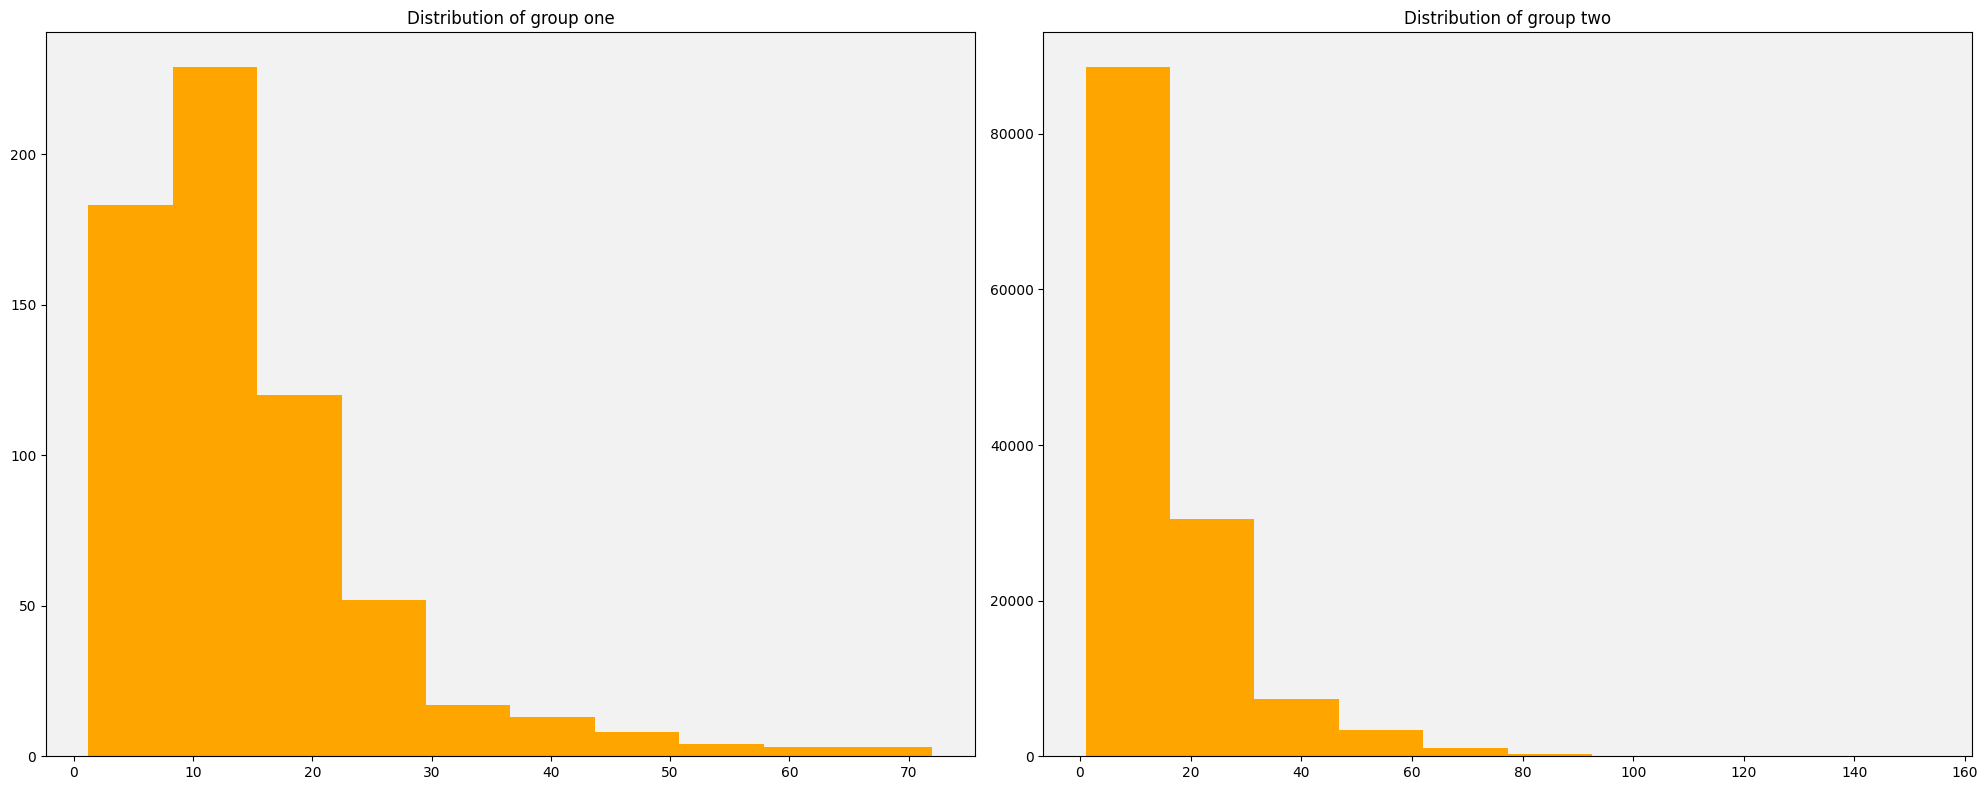

In [301]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(20,8))

# Plot the histogram for 'one' in the first subplot
plt.subplot(1, 2, 1)
plt.hist(one, color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' in the second subplot
plt.subplot(1, 2, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# since the distributions are similar; proceeding with Mann whitney U test

<b>Mann-Whitney U Test to check dependency of trip_duration_mins on store and forward flag</b>

Null Hypothesis = Ho = "Mean trip_duration_mins is same for both groups in store and forward flag"

Alternate Hypothesis = Ha = "Mean trip_duration_mins is different for both groups in store and forward flag"

This will be a two-tailed test.

`Significance Level = 0.05`

In [302]:
# Mann-Whitney U Test to check dependency of trip duration on store and forward flag
Ho = "Mean trip_duration_mins is same for both groups in store and forward flag"   # Stating the Null Hypothesis
Ha = "Mean trip_duration_mins is different for both groups in store and forward flag"   # Stating the Alternate Hypothesis

yes = np.array(taxidf1[taxidf1.store_and_fwd_flag == 'Y']['trip_duration_mins']) 
no = np.array(taxidf1[taxidf1.store_and_fwd_flag == 'N']['trip_duration_mins']) 

t_sf, pval_sf  = stats.mannwhitneyu(yes, no)
# print('p-value : ', pval_sf)

if pval_sf < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({pval_sf.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({pval_sf.round(3)}) > 0.05')

Mean trip_duration_mins is same for both groups in store and forward flag as the p_value (0.809) > 0.05


<b>Payment Type Feature</b>

In [303]:
#cheking the assumptions for ANOVA

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


one = taxidf1[taxidf1.payment_type == 1]['trip_duration_mins']
two = taxidf1[taxidf1.payment_type == 2]['trip_duration_mins']
three = taxidf1[taxidf1.payment_type == 3]['trip_duration_mins']
four = taxidf1[taxidf1.payment_type == 4]['trip_duration_mins']

print(stats.shapiro(one))
print(stats.shapiro(two))
print(stats.shapiro(three))
print(stats.shapiro(four))


#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one, two, three, four)

if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.7889763116836548, pvalue=0.0)
ShapiroResult(statistic=0.7835836410522461, pvalue=0.0)
ShapiroResult(statistic=0.7302563786506653, pvalue=1.5422756275648884e-24)
ShapiroResult(statistic=0.7910540103912354, pvalue=9.942523812249346e-30)
Data has unequal variance as the p_value 0.0 < 0.05


In [136]:
# since the assumptions did not satisfy; proceeding with non-parametric test

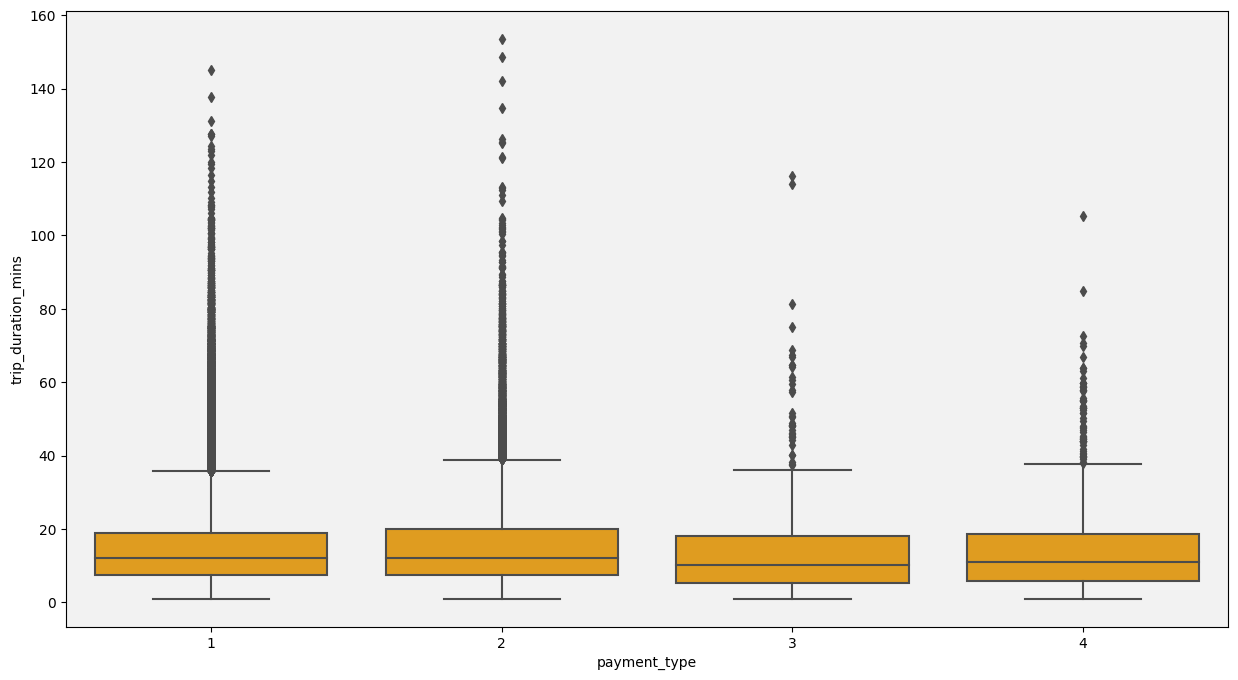

In [304]:
# Kruskal wallis H - checking the assumption of similar distributions for groups
plt.figure(figsize = (15,8))
ax = plt.axes()
ax.set_facecolor("#F2F2F2") 
sns.boxplot(x=taxidf1.payment_type, y=taxidf1.trip_duration_mins, color = 'orange')
plt.show()

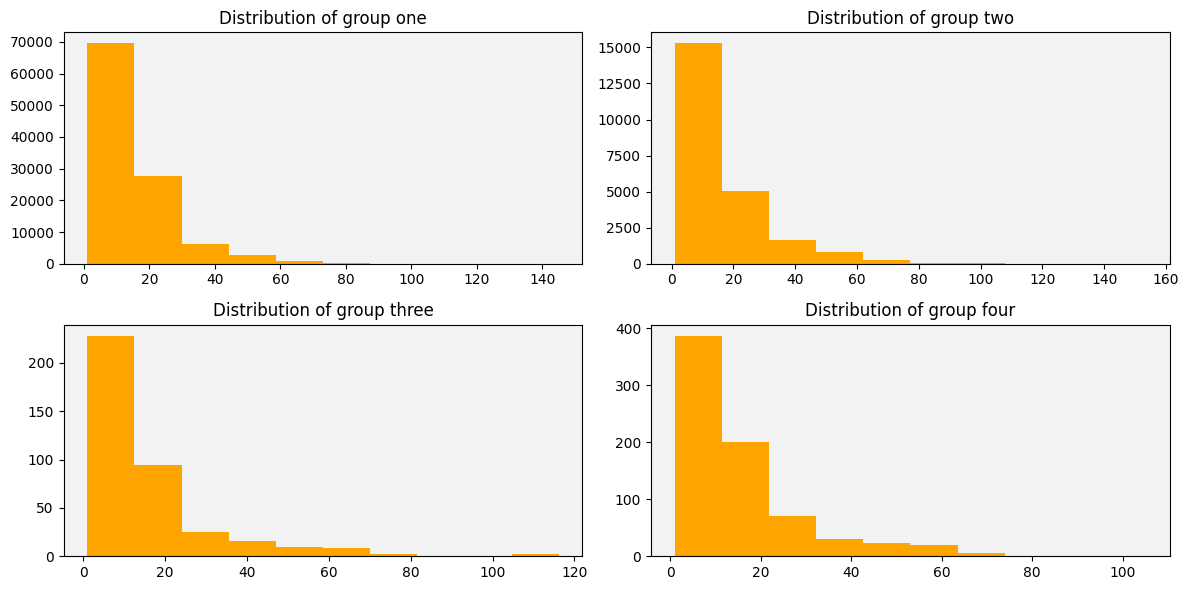

In [305]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# Plot the histogram for 'one' 
plt.subplot(2, 2, 1)
plt.hist(one, color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' 
plt.subplot(2,2, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'three' 
plt.subplot(2,2, 3)
plt.hist(three, color='orange')
plt.title('Distribution of group three')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'four' 
plt.subplot(2,2, 4)
plt.hist(four, color='orange')
plt.title('Distribution of group four')
plt.gca().set_facecolor("#F2F2F2")


# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# since the distributions are likely similar; proceeding with kruskal test

<b>Kruskal-Wallis H Test to check dependency of trip duration on payment type</b>

Null Hypothesis = Ho = "Payment type has no effect on trip duration"

Alternate Hypothesis = Ha = "Payment type has an effect on trip duration"

`Significance Level = 0.05`

In [306]:
# Kruskal test to check dependency of payment type on trip_duration_mins
Ho = "Payment Type has no effect on trip_duration_mins"   # Stating the Null Hypothesis
Ha = "Payment Type has an effect on trip_duration_mins"   # Stating the Alternate Hypothesis


f_pt, pval_pt = stats.kruskal(one, two, three, four)
# print('p-value : ', pval_pt)


if pval_pt < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_pt.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_pt.round(3)} > 0.05')

Payment Type has an effect on trip_duration_mins as the p_value 0.0 < 0.05


<b>Fare Amount Feature</b>

In [307]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


trip_duration_mins = taxidf1['trip_duration_mins']
fare_amount = taxidf1['fare_amount']

print(stats.shapiro(trip_duration_mins))
print(stats.shapiro(fare_amount))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(trip_duration_mins, fare_amount)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.7860287427902222, pvalue=0.0)
ShapiroResult(statistic=0.6863034963607788, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# assumptions of Pearson R are not met; proceeding with Spearman R

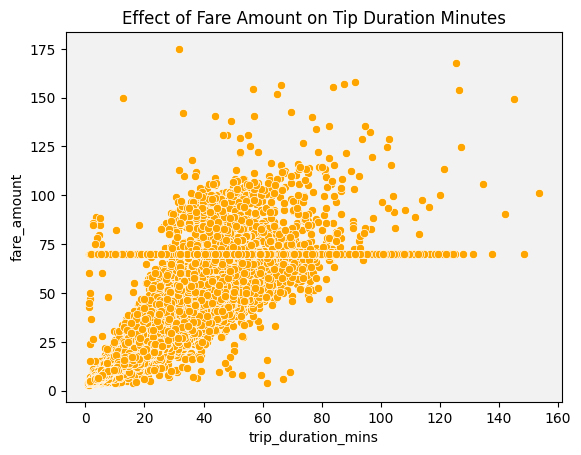

In [308]:
#Assumption of Spearman R - Monotonicity
ax = plt.axes()
sns.scatterplot(x=taxidf1['trip_duration_mins'], y=taxidf1['fare_amount'], color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.title('Effect of Fare Amount on Tip Duration Minutes')
plt.show()

In [ ]:
# Since the assumption of monotonicity is met; proceeding with Spearman R test

<b>Spearman's Rho Test to check dependency of trip_duration_mins on fare amount</b>

Null Hypothesis = Ho = "Fare amount has no effect on trip_duration_mins"

Alternate Hypothesis = Ha = "Fare amount has an effect on trip_duration_mins"

This will be a two-tailed test.

`Significance Level = 0.05`

In [309]:
# Spearman's Rho Test to check dependency of trip_duration_mins on fare amount
Ho = "Fare amount has no effect on trip_duration_mins"   # Stating the Null Hypothesis
Ha = "Fare amount has an effect on trip_duration_mins"   # Stating the Alternate Hypothesis

rho_fa, pval_fa = stats.spearmanr(taxidf1['fare_amount'], taxidf1['trip_duration_mins'])
# print("p-value : ", pval_fa)

if pval_fa < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_fa.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_fa.round(3)} > 0.05')

Fare amount has an effect on trip_duration_mins as the p_value 0.0 < 0.05


<b>Extra Feature</b>

In [310]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


trip_duration_mins = taxidf1['trip_duration_mins']
extra = taxidf1['extra']

print(stats.shapiro(trip_duration_mins))
print(stats.shapiro(extra))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(trip_duration_mins, extra)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.7860287427902222, pvalue=0.0)
ShapiroResult(statistic=0.34968101978302, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# since the assumptions did not satisfy; proceeding with non-parametric test

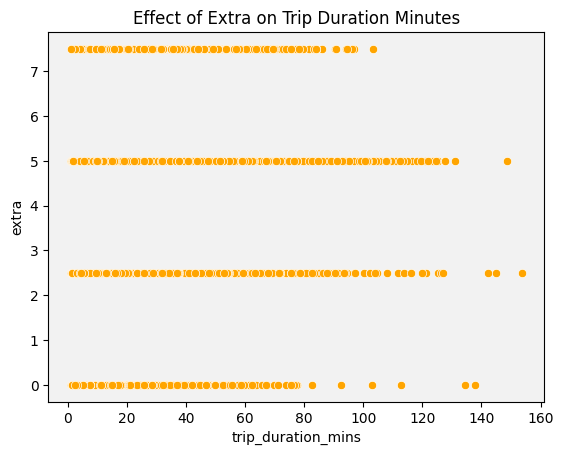

In [311]:
#Assumption of Spearman R - Monotonicity
ax = plt.axes()
sns.scatterplot(x=taxidf1['trip_duration_mins'], y=taxidf1['extra'], color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.title('Effect of Extra on Trip Duration Minutes')
plt.show()

<b>Spearman's Rho Test to check dependency of trip_duration_mins on extras</b>

Null Hypothesis = Ho = "Extras has no effect on trip_duration_mins"

Alternate Hypothesis = Ha = "Extras has an effect on trip_duration_mins"

This will be a two-tailed test.

`Significance Level = 0.05`

In [312]:
# Spearman's Rho Test to check dependency of trip_duration_minson extras
Ho = "Extras has no effect on trip_duration_mins"   # Stating the Null Hypothesis
Ha = "Extras has an effect on trip_duration_mins"   # Stating the Alternate Hypothesis

rho_ex, pval_ex = stats.spearmanr(taxidf1['extra'], taxidf1['trip_duration_mins'])
# print("p-value : ", pval_ex)

if pval_ex < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_ex} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_ex} > 0.05')

Extras has an effect on trip_duration_mins as the p_value 0.0 < 0.05


<b>Tip Amount Feature</b>

In [313]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


trip_duration_mins = taxidf1['trip_duration_mins']
tip_amount = taxidf1['tip_amount']

print(stats.shapiro(trip_duration_mins))
print(stats.shapiro(tip_amount))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(trip_duration_mins, tip_amount)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.7860287427902222, pvalue=0.0)
ShapiroResult(statistic=0.7540849447250366, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# since the assumptions did not satisfy; proceeding with non-parametric test

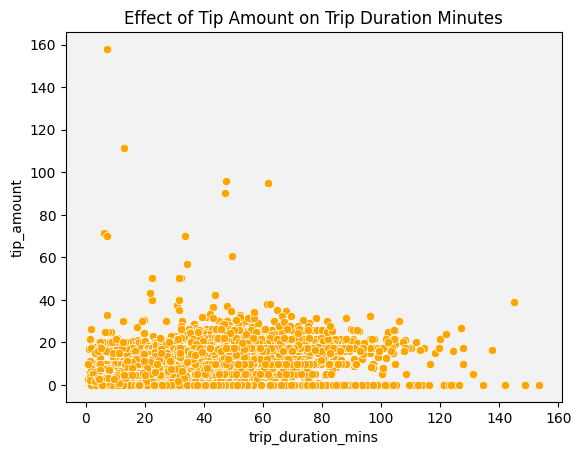

In [314]:
#Assumption of Spearman R - Monotonicity
ax = plt.axes()
sns.scatterplot(x=taxidf1['trip_duration_mins'], y=taxidf1['tip_amount'], color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.title('Effect of Tip Amount on Trip Duration Minutes')
plt.show()

In [ ]:
# Since the assumption of monotonicity is met; proceeding with Spearman R test

<b>Spearman's Rho Test to check dependency of trip_duration_mins on tip amount</b>

Null Hypothesis = Ho = "Tip amount has no effect on trip_duration_mins"

Alternate Hypothesis = Ha = "Tip amount has an effect on trip_duration_mins"

This will be a two-tailed test.

`Significance Level = 0.05`

In [315]:
# Spearman's Rho Test to check dependency of trip_duration_mins on tip amount
Ho = "Tip Amount has no effect on trip_duration_mins"   # Stating the Null Hypothesis
Ha = "Tip Amount has an effect on trip_duration_mins"   # Stating the Alternate Hypothesis

rho_ta, pval_ta = stats.spearmanr(taxidf1['tip_amount'], taxidf1['trip_duration_mins'])
# print("p-value : ", pval_ta)

if pval_ta < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_ta} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_ta} > 0.05')

Tip Amount has an effect on trip_duration_mins as the p_value 0.0 < 0.05


<b>Tolls Amount Feature</b>

In [316]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


trip_duration = taxidf1['trip_duration_mins']
tolls_amount = taxidf1['tolls_amount']

print(stats.shapiro(trip_duration))
print(stats.shapiro(tolls_amount))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(trip_duration, tolls_amount)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.7860287427902222, pvalue=0.0)
ShapiroResult(statistic=0.27280616760253906, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# since the assumptions did not satisfy; proceeding with non-parametric test

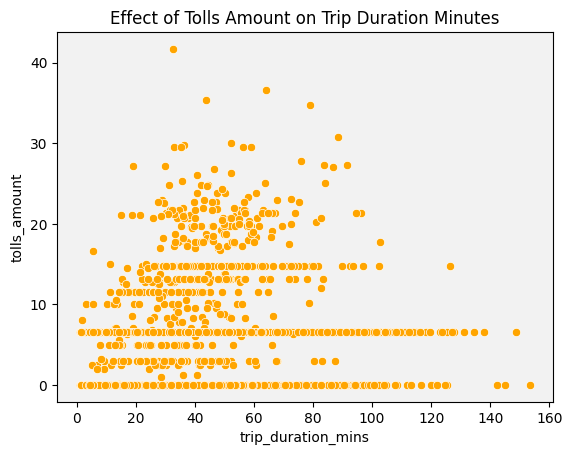

In [317]:
#Assumption of Spearman R - Monotonicity
ax = plt.axes()
sns.scatterplot(x=taxidf1['trip_duration_mins'], y=taxidf1['tolls_amount'], color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.title('Effect of Tolls Amount on Trip Duration Minutes')
plt.show()

In [ ]:
# Since the assumption of monotonicity is met; proceeding with Spearman R test

<b>Spearman's Rho Test to check dependency of trip duration on tolls amount</b>

Null Hypothesis = Ho = "Tolls amount has no effect on trip duration in mins"

Alternate Hypothesis = Ha = "Tolls amount has an effect on trip duration in mins"

This will be a two-tailed test.

`Significance Level = 0.05`

In [318]:
# Spearman's Rho Test to check dependency of tolls amount on trip duration
Ho = "Tolls amount has no effect on trip duration in mins"   # Stating the Null Hypothesis
Ha = "Tolls amount has an effect on trip duration in mins"   # Stating the Alternate Hypothesis

rho_ts, pval_ts = stats.spearmanr(taxidf1['tolls_amount'], taxidf1['trip_duration_mins'])
# print("p-value : ", pval_ts)

if pval_ts < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_ts.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_ts.round(3)} > 0.05')

Tolls amount has an effect on trip duration in mins as the p_value 0.0 < 0.05


<b>Total Amount Feature</b>

In [319]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'


total_amount = taxidf1['total_amount']
trip_duration_mins = taxidf1['trip_duration_mins']

print(stats.shapiro(total_amount))
print(stats.shapiro(trip_duration_mins))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(total_amount, trip_duration_mins)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.6719603538513184, pvalue=0.0)
ShapiroResult(statistic=0.7860287427902222, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# since the assumptions did not satisfy; proceeding with non-parametric test

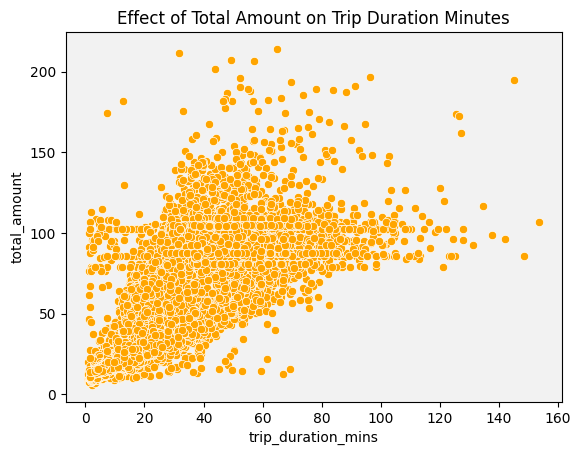

In [320]:
#Assumption of Spearman R - Monotonicity
ax = plt.axes()
sns.scatterplot(x=taxidf1['trip_duration_mins'], y=taxidf1['total_amount'], color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.title('Effect of Total Amount on Trip Duration Minutes')
plt.show()

In [ ]:
# Since the assumption of monotonicity is met; proceeding with Spearman R test

<b>Spearman's Rho Test to check dependency of total amount on trip duration </b>

Null Hypothesis = Ho = "Trip duration  has no effect on total amount"

Alternate Hypothesis = Ha = "Trip duration has an effect on total amount"

This will be a two-tailed test.

`Significance Level = 0.05`

In [321]:
# Spearman's Rho Test to check dependency of total amount on trip duration 
Ho = "Trip duration  has no effect on total amount"   # Stating the Null Hypothesis
Ha = "Trip duration  has an effect on total amount"   # Stating the Alternate Hypothesis

rho_tds, pval_tds = stats.spearmanr(taxidf1['trip_duration_mins'], taxidf1['total_amount'])
# print("p-value : ", pval_tds)

if pval_tds < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_tds.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_tds.round(3)} > 0.05')

Trip duration  has an effect on total amount as the p_value 0.0 < 0.05


<b>Congestion Surcharge Feature</b>

In [322]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'

one = taxidf1[taxidf1.congestion_surcharge == 0]['trip_duration_mins']
two = taxidf1[taxidf1.congestion_surcharge == 2.5]['trip_duration_mins']


print(stats.shapiro(one))
print(stats.shapiro(two))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one, two)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.9329335689544678, pvalue=0.0)
ShapiroResult(statistic=0.7785806059837341, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# since the assumptions did not satisfy; proceeding with non-parametric test

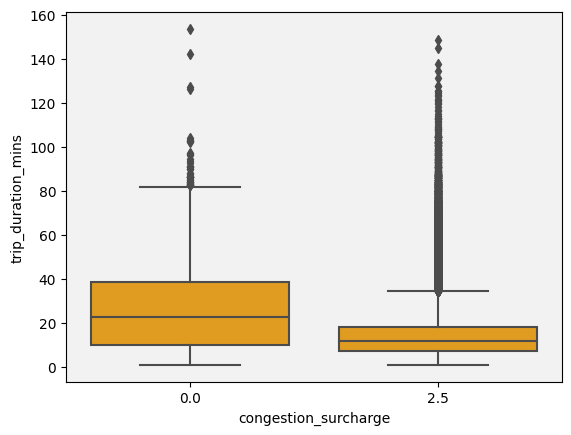

In [323]:
# Mann Whitney U - checking the assumption of similar distributions for groups
ax = plt.axes()
sns.boxplot(x=taxidf1.congestion_surcharge, y=taxidf1.trip_duration_mins, color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.show()

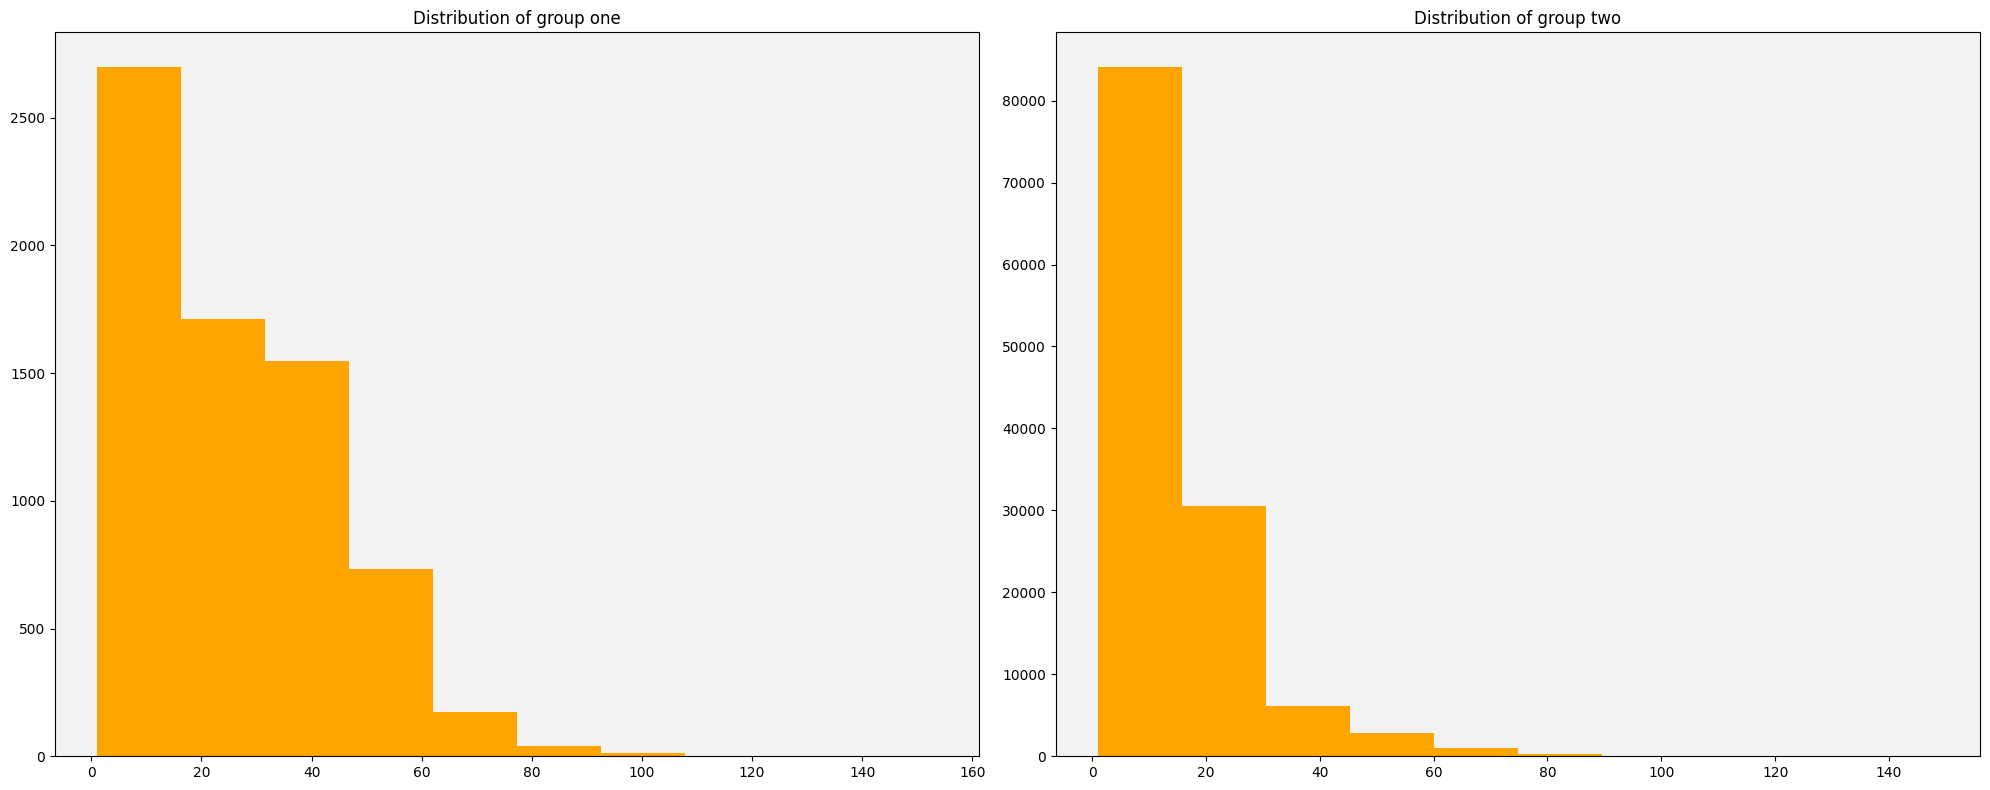

In [324]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(20,8))

# Plot the histogram for 'one' in the first subplot
plt.subplot(1, 2, 1)
plt.hist(one, color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' in the second subplot
plt.subplot(1, 2, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# since the distributions are likely similar; proceeding with Mann whitney U test

<b>Mann-Whitney U Test to check dependency of trip duration in mins on congestion surcharge</b>

Null Hypothesis = Ho = "Mean trip duration in mins is same for both values in congestion surcharge"

Alternate Hypothesis = Ha = "Mean trip duration in mins  is different for both values in congestion surcharge"

This will be a two-tailed test.

`Significance Level = 0.05`

In [325]:
# Mann-Whitney U Test to check dependency of trip duartion on congestion surcharge
Ho = "Mean trip duration  is same for both values in congestion surcharge"   # Stating the Null Hypothesis
Ha = "Mean trip duartion is different for both values in congestion surcharge"   # Stating the Alternate Hypothesis

one = np.array(taxidf1[taxidf1.congestion_surcharge == 0]['trip_duration_mins']) 
two = np.array(taxidf1[taxidf1.congestion_surcharge == 2.5]['trip_duration_mins']) 

t_cs, pval_cs  = stats.mannwhitneyu(one, two)
# print('p-value : ', pval_cs)

if pval_cs < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_cs.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_cs.round(3)} > 0.05')

Mean trip duartion is different for both values in congestion surcharge as the p_value 0.0 < 0.05


<b>Airport Fee Feature</b>

In [326]:
#cheking the assumptions for t test

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'

one = taxidf1[taxidf1.Airport_fee == 0]['trip_duration_mins']
two = taxidf1[taxidf1.Airport_fee == 1.75]['trip_duration_mins']


print(stats.shapiro(one))
print(stats.shapiro(two))

#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one, two)


if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.7813756465911865, pvalue=0.0)
ShapiroResult(statistic=0.9873891472816467, pvalue=2.5545730384612273e-29)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# since the assumptions did not satisfy; proceeding with non-parametric test

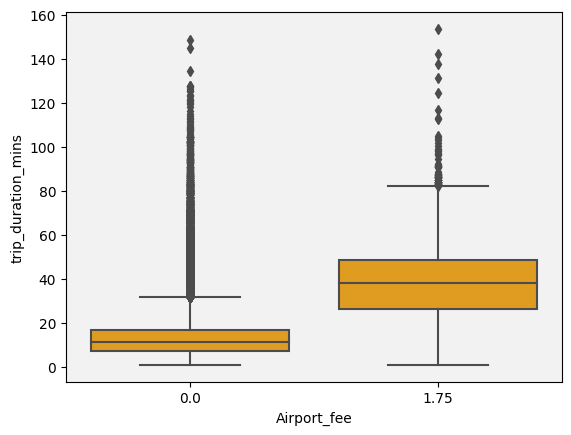

In [327]:
# Mann Whitney U - checking the assumption of similar distributions for groups
ax = plt.axes()
sns.boxplot(x=taxidf1.Airport_fee, y=taxidf1.trip_duration_mins, color = 'orange')
ax.set_facecolor("#F2F2F2")
plt.show()

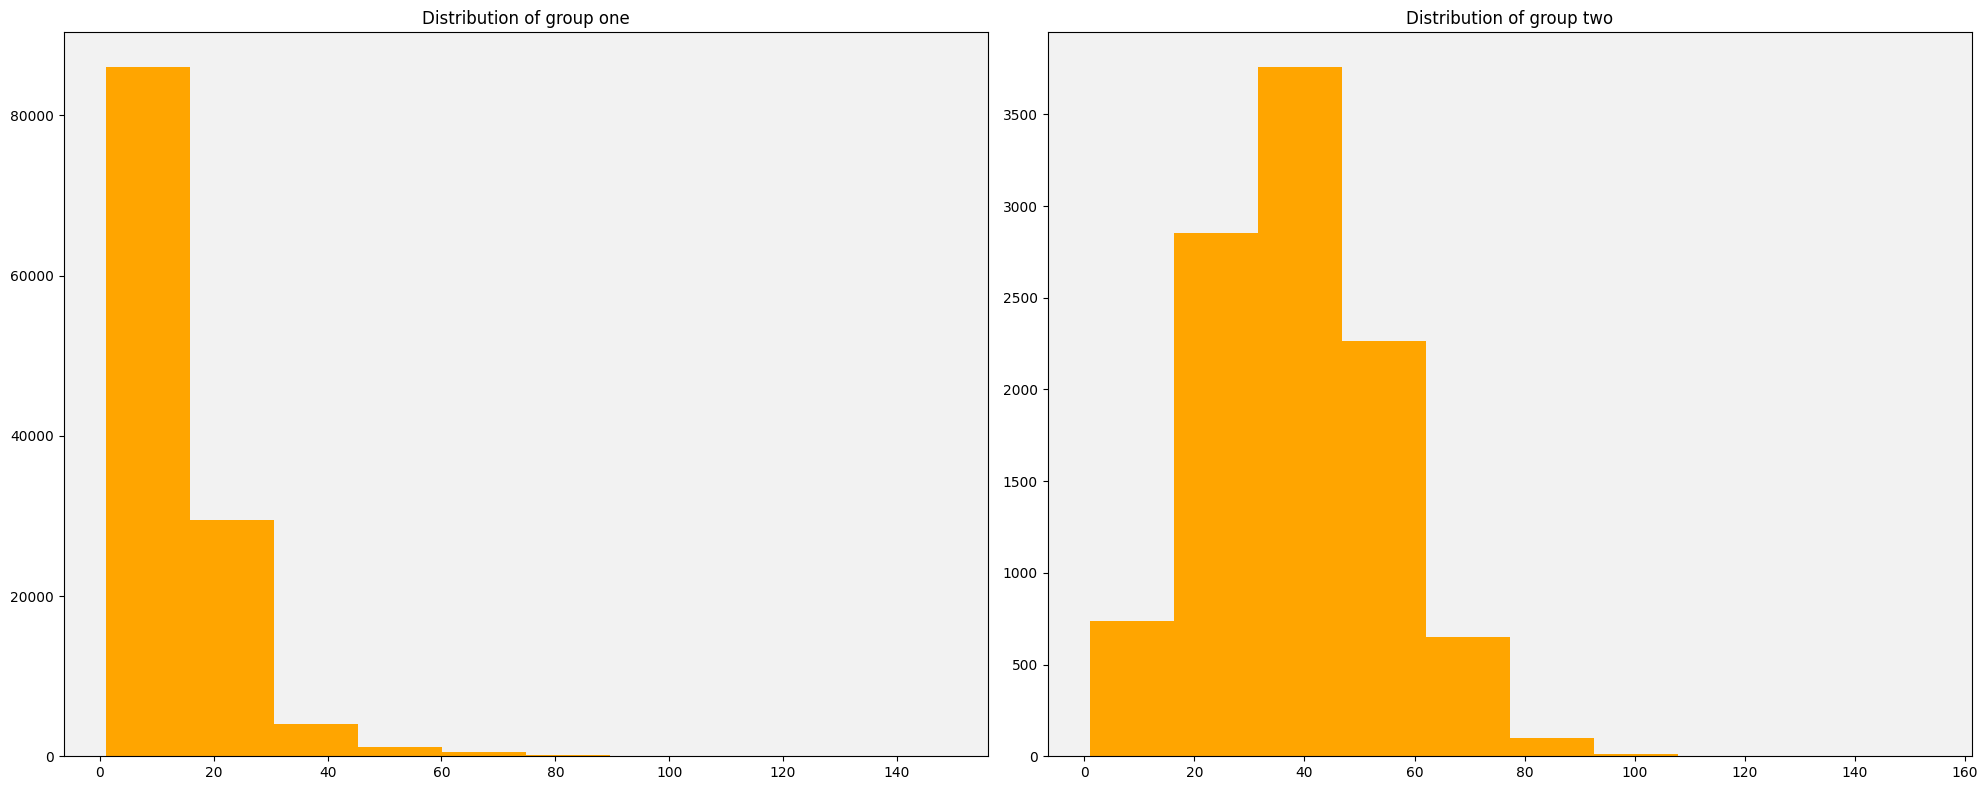

In [328]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(20,8))

# Plot the histogram for 'one' in the first subplot
plt.subplot(1, 2, 1)
plt.hist(one, color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' in the second subplot
plt.subplot(1, 2, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# since the distributions are likely similar; proceeding with Mann whitney U test

<b>Mann-Whitney U Test to check dependency of trip duration on Airport Fee</b>

Null Hypothesis = Ho = "Mean trip duration is same for both values in Airport Fees"

Alternate Hypothesis = Ha = "Mean trip duration is different for both values in Airport Fees"

This will be a two-tailed test.

`Significance Level = 0.05`

In [329]:
# Mann-Whitney U Test to check dependency of trip duration on airport fees
Ho = "Mean trip duration is same for both values in airport fees"   # Stating the Null Hypothesis
Ha = "Mean trip duartion is different for both values in airport fees"   # Stating the Alternate Hypothesis

one = np.array(taxidf1[taxidf1.Airport_fee == 0]['trip_duration_mins']) 
two = np.array(taxidf1[taxidf1.Airport_fee == 1.75]['trip_duration_mins']) 

t_af, pval_af  = stats.mannwhitneyu(one, two)
# print('p-value : ', pval_af)

if pval_af < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_af.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_af.round(3)} > 0.05')

Mean trip duartion is different for both values in airport fees as the p_value 0.0 < 0.05


<b>Pickup Hour Feature</b>

In [330]:
#cheking the assumptions for ANOVA

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'

one = taxidf1[taxidf1.pickup_hour == 16]['trip_duration_mins']
two = taxidf1[taxidf1.pickup_hour == 17]['trip_duration_mins']
three = taxidf1[taxidf1.pickup_hour == 18]['trip_duration_mins']
four = taxidf1[taxidf1.pickup_hour == 19]['trip_duration_mins']



print(stats.shapiro(one))
print(stats.shapiro(two))
print(stats.shapiro(three))
print(stats.shapiro(four))


#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one,two,three,four)
# print("\nLevene test statistics :", levene_stat)
# print("\nLevene p-value :", levene_pval)

if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.7818880677223206, pvalue=0.0)
ShapiroResult(statistic=0.7955106496810913, pvalue=0.0)
ShapiroResult(statistic=0.812761664390564, pvalue=0.0)
ShapiroResult(statistic=0.838067352771759, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# since the assumptions did not satisfy; proceeding with non-parametric test

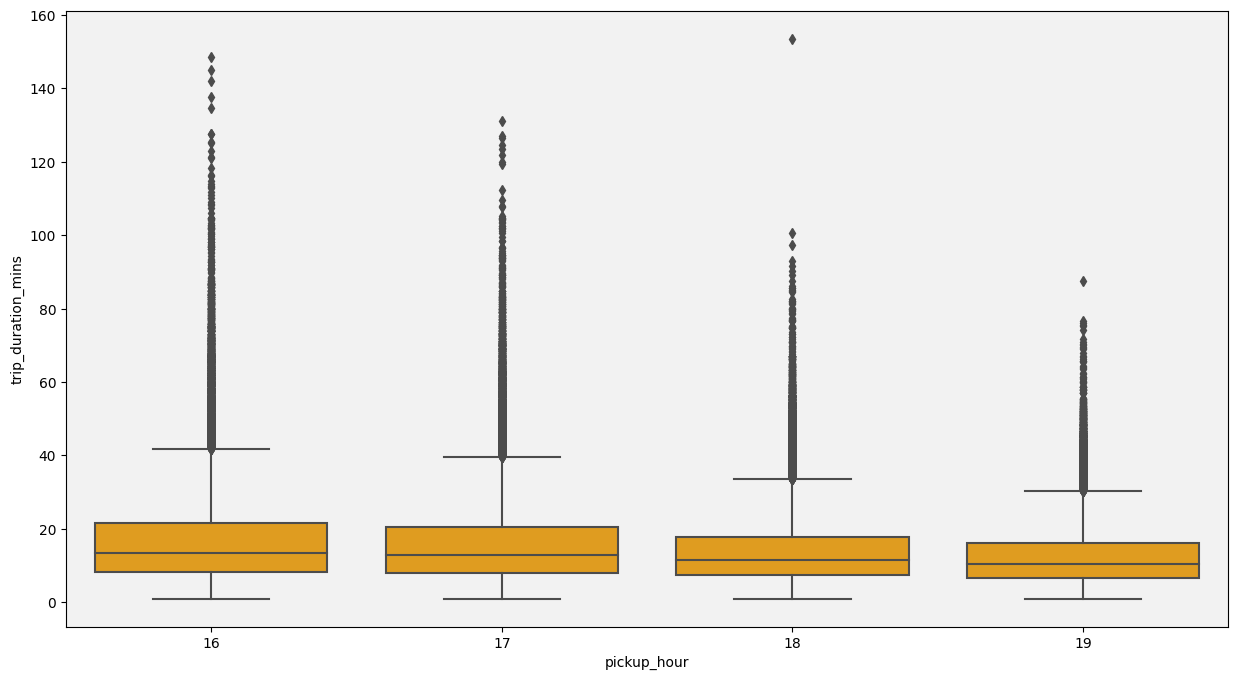

In [331]:
# Kruskal wallis H - checking the assumption of similar distributions for groups
plt.figure(figsize = (15,8))
ax = plt.axes()
ax.set_facecolor("#F2F2F2") 
sns.boxplot(x=taxidf1.pickup_hour, y=taxidf1.trip_duration_mins, color = 'orange')
plt.show()

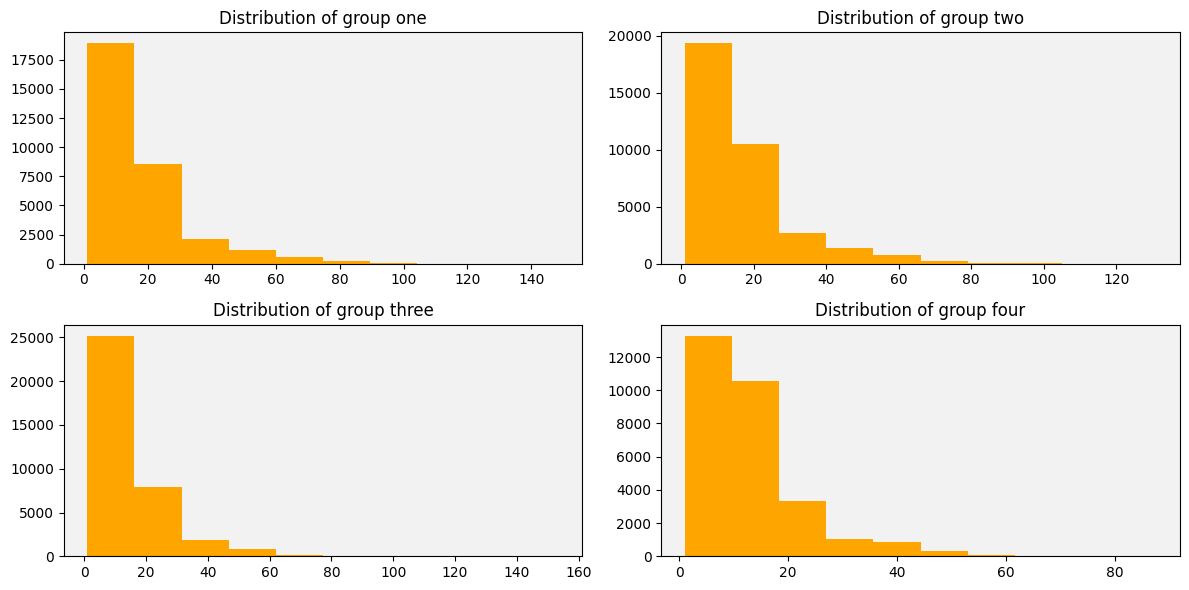

In [333]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# Plot the histogram for 'one' 
plt.subplot(2, 2, 1)
plt.hist(one, color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' 
plt.subplot(2,2, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'three' 
plt.subplot(2,2, 3)
plt.hist(three, color='orange')
plt.title('Distribution of group three')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'four' 
plt.subplot(2,2, 4)
plt.hist(four, color='orange')
plt.title('Distribution of group four')
plt.gca().set_facecolor("#F2F2F2")


# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# since the distributions are similar; proceeding with kruskal test

<b>Kruskal-Wallis H Test to check dependency of trip duration on pickup hour</b>

Null Hypothesis = Ho = "Pickup hour has no effect on trip duration"

Alternate Hypothesis = Ha = "Pickup hour has an effect on trip duration"

`Significance Level = 0.05`

In [334]:
# Kruskal test to check dependency of pickup hour on trip duration
Ho = "Pickup Hour has no effect on trip duration"   # Stating the Null Hypothesis
Ha = "Pickup Hour has an effect on trip duration"   # Stating the Alternate Hypothesis

one = taxidf1[taxidf1.pickup_hour == 16]['trip_duration_mins']
two = taxidf1[taxidf1.pickup_hour == 17]['trip_duration_mins']
three = taxidf1[taxidf1.pickup_hour == 18]['trip_duration_mins']
four = taxidf1[taxidf1.pickup_hour == 19]['trip_duration_mins']


f_ph, pval_ph = stats.kruskal(one, two, three, four)
# print('p-value : ', pval_ph)


if pval_ph < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_ph.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_ph.round(3)} > 0.05')

Pickup Hour has an effect on trip duration as the p_value 0.0 < 0.05


<b>Drop Hour Feature</b>

In [335]:
#cheking the assumptions for ANOVA

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'

one = taxidf1[taxidf1.drop_hour == 16]['trip_duration_mins']
two = taxidf1[taxidf1.drop_hour == 17]['trip_duration_mins']
three = taxidf1[taxidf1.drop_hour == 18]['trip_duration_mins']
four = taxidf1[taxidf1.drop_hour == 19]['trip_duration_mins']
five = taxidf1[taxidf1.drop_hour == 20]['trip_duration_mins']
six = taxidf1[taxidf1.drop_hour == 21]['trip_duration_mins']




print(stats.shapiro(one))
print(stats.shapiro(two))
print(stats.shapiro(three))
print(stats.shapiro(four))
print(stats.shapiro(five))
print(stats.shapiro(six))


#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(one,two,three,four,five,six)
# print("\nLevene test statistics :", levene_stat)
# print("\nLevene p-value :", levene_pval)

if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.8829864859580994, pvalue=0.0)
ShapiroResult(statistic=0.7971823811531067, pvalue=0.0)
ShapiroResult(statistic=0.763486385345459, pvalue=0.0)
ShapiroResult(statistic=0.7682604193687439, pvalue=0.0)
ShapiroResult(statistic=0.901394784450531, pvalue=0.0)
ShapiroResult(statistic=0.7562494874000549, pvalue=0.01383955404162407)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# since the assumptions did not satisfy; proceeding with non-parametric test

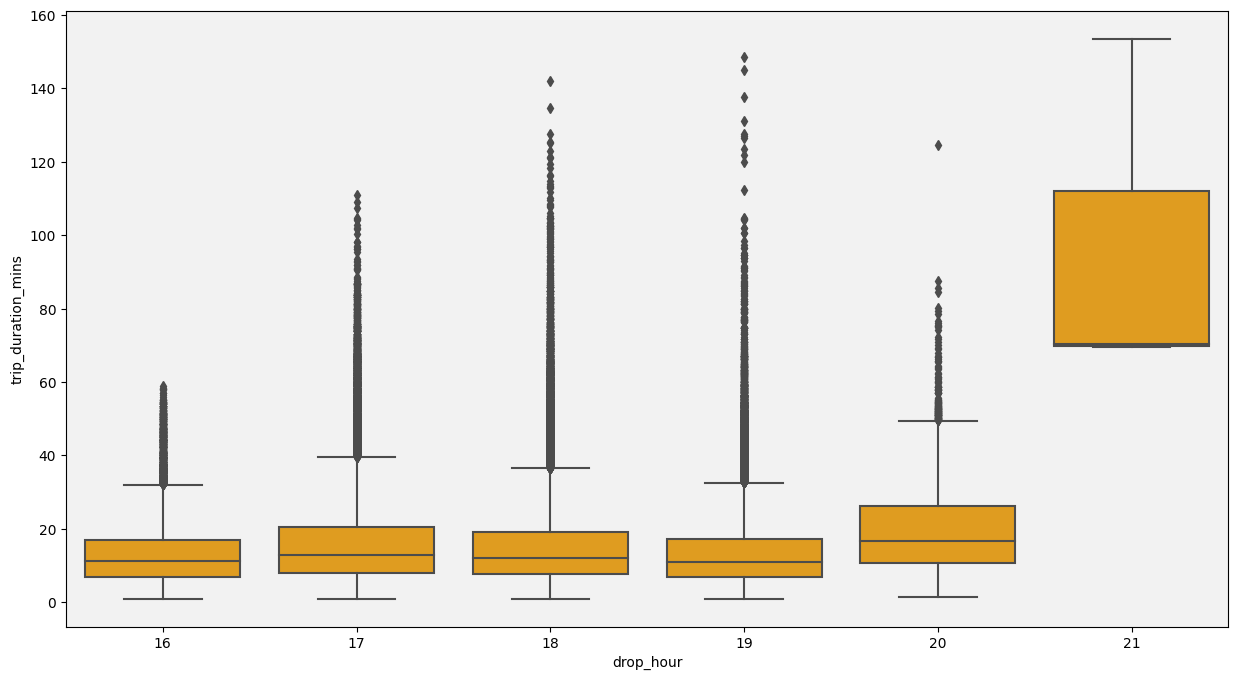

In [336]:
# Kruskal wallis H - checking the assumption of similar distributions for groups
plt.figure(figsize = (15,8))
ax = plt.axes()
ax.set_facecolor("#F2F2F2") 
sns.boxplot(x=taxidf1.drop_hour, y=taxidf1.trip_duration_mins, color = 'orange')
plt.show()

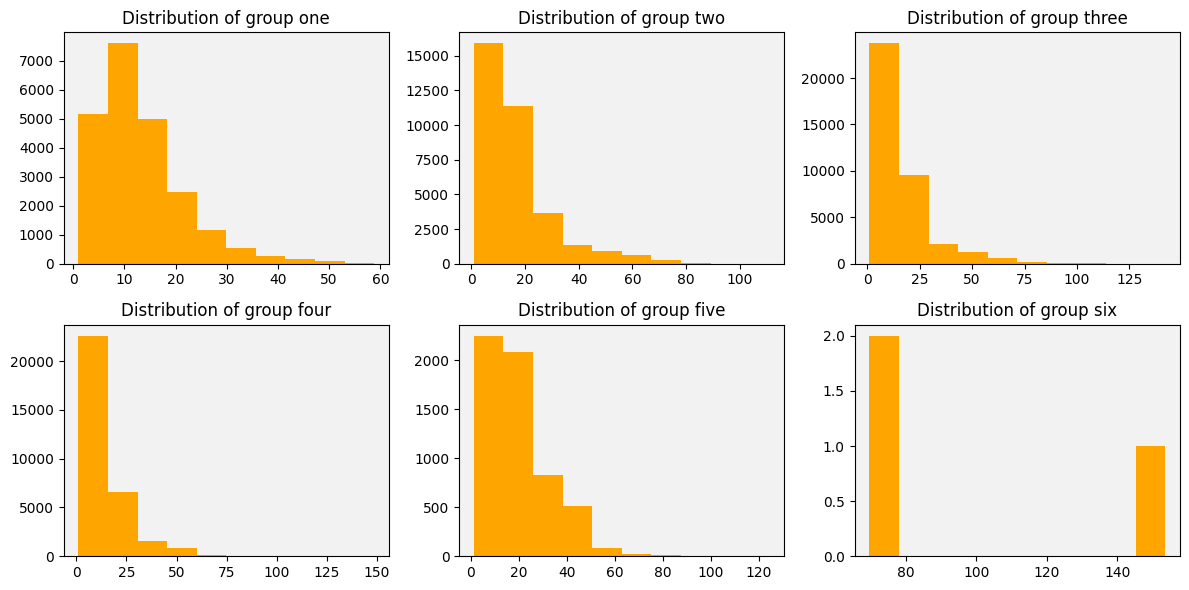

In [337]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# Plot the histogram for 'one' 
plt.subplot(2, 3, 1)
plt.hist(one, color='orange')
plt.title('Distribution of group one')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' 
plt.subplot(2,3, 2)
plt.hist(two, color='orange')
plt.title('Distribution of group two')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'three' 
plt.subplot(2,3, 3)
plt.hist(three, color='orange')
plt.title('Distribution of group three')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'four' 
plt.subplot(2,3, 4)
plt.hist(four, color='orange')
plt.title('Distribution of group four')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'five' 
plt.subplot(2,3,5)
plt.hist(five, color='orange')
plt.title('Distribution of group five')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'six' 
plt.subplot(2,3, 6)
plt.hist(six, color='orange')
plt.title('Distribution of group six')
plt.gca().set_facecolor("#F2F2F2")


# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# since the distributions are similar; proceeding with kruskal test

<b>Kruskal-Wallis H Test to check dependency of trip duration on Dropoff Hour</b>

Null Hypothesis = Ho = "Dropoff Hour has no effect on trip duration"

Alternate Hypothesis = Ha = "Dropoff Hour has an effect on trip duration"

`Significance Level = 0.05`

In [338]:
# Kruskal test to check dependency of dropoff hour on trip duration
Ho = "Dropoff Hour has no effect on trip duration"   # Stating the Null Hypothesis
Ha = "Dropoff Hour has an effect on trip duration"   # Stating the Alternate Hypothesis

one = taxidf1[taxidf1.drop_hour == 16]['trip_duration_mins']
two = taxidf1[taxidf1.drop_hour == 17]['trip_duration_mins']
three = taxidf1[taxidf1.drop_hour == 18]['trip_duration_mins']
four = taxidf1[taxidf1.drop_hour == 19]['trip_duration_mins']
five = taxidf1[taxidf1.drop_hour == 20]['trip_duration_mins']
six = taxidf1[taxidf1.drop_hour == 21]['trip_duration_mins']


f_dh, pval_dh = stats.kruskal(one, two, three, four, five, six)
# print('p-value : ', pval_dh)


if pval_dh < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_dh.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_dh.round(3)} > 0.05')

Dropoff Hour has an effect on trip duration as the p_value 0.0 < 0.05


<b>Pickup Day Feature</b>

In [339]:
#cheking the assumptions for ANOVA

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'

monday = taxidf1[taxidf1.pickup_day == 'Monday']['trip_duration_mins']
tuesday = taxidf1[taxidf1.pickup_day == 'Tuesday']['trip_duration_mins']
wednesday = taxidf1[taxidf1.pickup_day == 'Wednesday']['trip_duration_mins']
thursday = taxidf1[taxidf1.pickup_day == 'Thursday']['trip_duration_mins']
friday = taxidf1[taxidf1.pickup_day == 'Friday']['trip_duration_mins']



print(stats.shapiro(monday))
print(stats.shapiro(tuesday))
print(stats.shapiro(wednesday))
print(stats.shapiro(thursday))
print(stats.shapiro(friday))


#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(monday,tuesday,wednesday,thursday,friday)
# print("\nLevene test statistics :", levene_stat)
# print("\nLevene p-value :", levene_pval)

if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.7917019724845886, pvalue=0.0)
ShapiroResult(statistic=0.7902604937553406, pvalue=0.0)
ShapiroResult(statistic=0.7754430770874023, pvalue=0.0)
ShapiroResult(statistic=0.8081616163253784, pvalue=0.0)
ShapiroResult(statistic=0.8127303123474121, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# since the assumptions did not satisfy; proceeding with non-parametric test

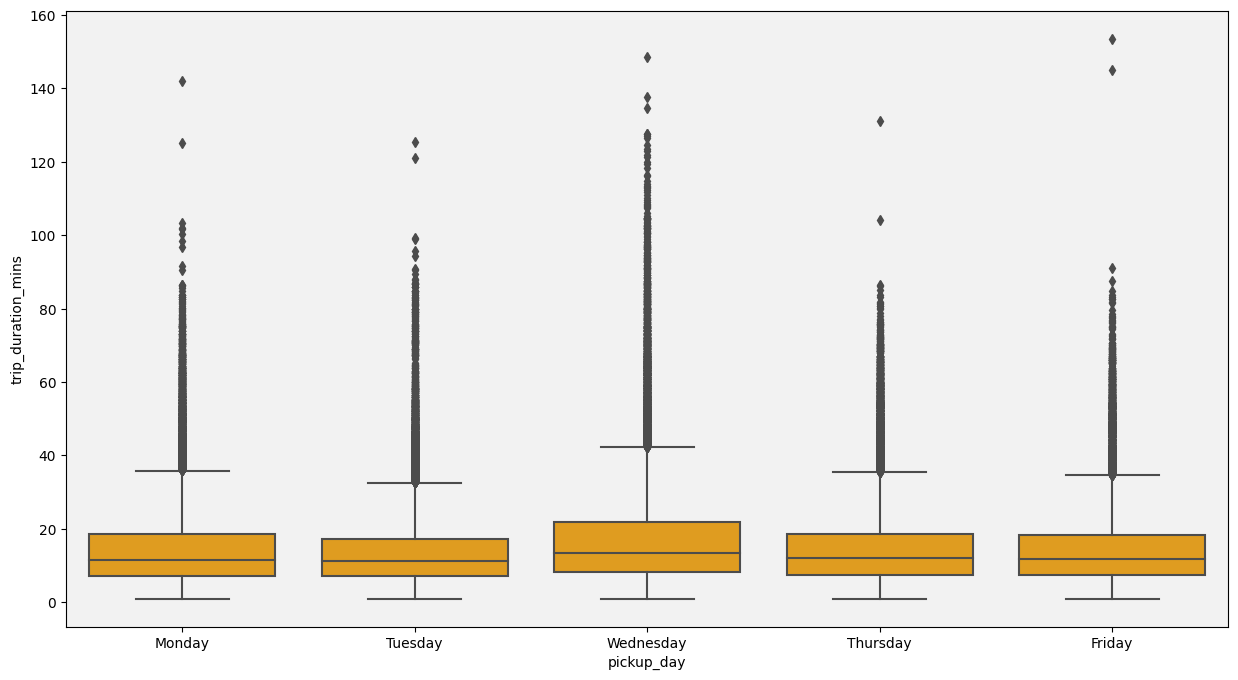

In [340]:
# Kruskal wallis H - checking the assumption of similar distributions for groups
plt.figure(figsize = (15,8))
ax = plt.axes()
ax.set_facecolor("#F2F2F2") 
sns.boxplot(x=taxidf1.pickup_day, y=taxidf1.trip_duration_mins, color = 'orange')
plt.show()

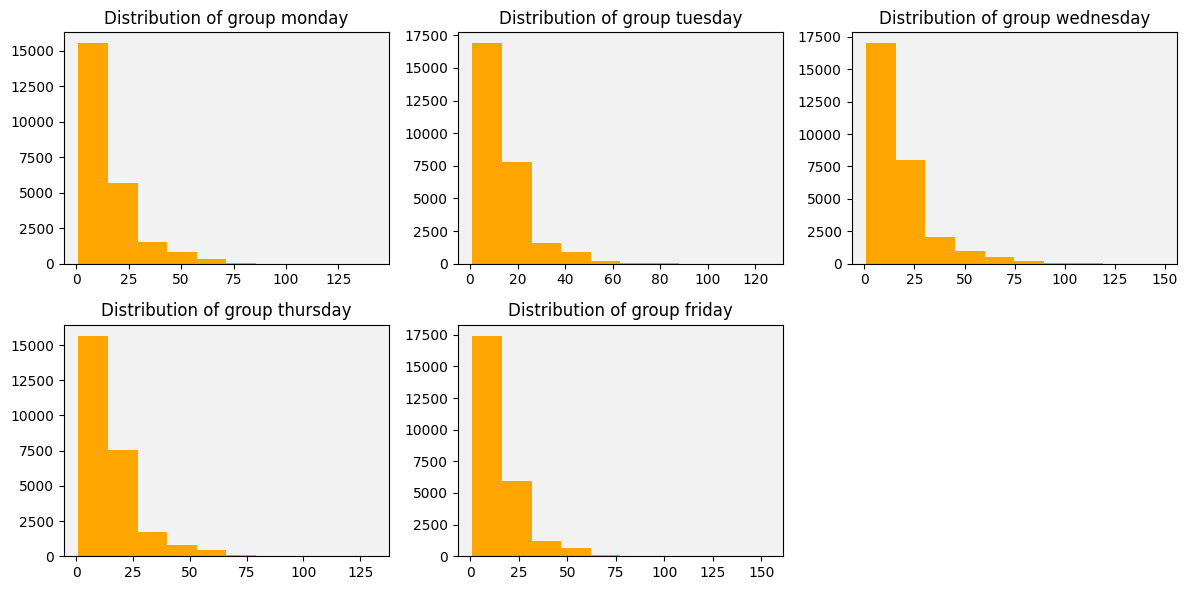

In [341]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# Plot the histogram for 'one' 
plt.subplot(2, 3, 1)
plt.hist(monday, color='orange')
plt.title('Distribution of group monday')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' 
plt.subplot(2,3, 2)
plt.hist(tuesday, color='orange')
plt.title('Distribution of group tuesday')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'three' 
plt.subplot(2,3, 3)
plt.hist(wednesday, color='orange')
plt.title('Distribution of group wednesday')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'four' 
plt.subplot(2,3, 4)
plt.hist(thursday, color='orange')
plt.title('Distribution of group thursday')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'five' 
plt.subplot(2,3, 5)
plt.hist(friday, color='orange')
plt.title('Distribution of group friday')
plt.gca().set_facecolor("#F2F2F2")


# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# since the distributions are similar; proceeding with kruskal test

<b>Kruskal-Wallis H Test to check dependency of trip duration on Pickup Day</b>

Null Hypothesis = Ho = "Pickup day has no effect on trip duration"

Alternate Hypothesis = Ha = "Pickup has an effect on trip duration"

`Significance Level = 0.05`

In [342]:
# Kruskal test to check dependency of pickup day on trip duration
Ho = "Pickup day has no effect on trip duration"    # Stating the Null Hypothesis
Ha = "Pickup has an effect on trip duration"   # Stating the Alternate Hypothesis

monday = taxidf1[taxidf1.pickup_day == 'Monday']['trip_duration_mins']
tuesday = taxidf1[taxidf1.pickup_day == 'Tuesday']['trip_duration_mins']
wednesday = taxidf1[taxidf1.pickup_day == 'Wednesday']['trip_duration_mins']
thursday = taxidf1[taxidf1.pickup_day == 'Thursday']['trip_duration_mins']
friday = taxidf1[taxidf1.pickup_day == 'Friday']['trip_duration_mins']


f_pd, pval_pd = stats.kruskal(monday, tuesday, wednesday, thursday, friday)
# print('p-value : ', pval_pd)


if pval_pd < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_pd.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_pd.round(3)} > 0.05')

Pickup has an effect on trip duration as the p_value 0.0 < 0.05


<b>Drop-off Day Feature</b>

In [343]:
#cheking the assumptions for ANOVA

#  1. check for normality of the data
# hypothesis
H0 = 'Data is normally distributed'
H1 = 'Data is not normally distributed'

monday = taxidf1[taxidf1.dropoff_day == 'Monday']['trip_duration_mins']
tuesday = taxidf1[taxidf1.dropoff_day == 'Tuesday']['trip_duration_mins']
wednesday = taxidf1[taxidf1.dropoff_day == 'Wednesday']['trip_duration_mins']
thursday = taxidf1[taxidf1.dropoff_day == 'Thursday']['trip_duration_mins']
friday = taxidf1[taxidf1.dropoff_day == 'Friday']['trip_duration_mins']



print(stats.shapiro(monday))
print(stats.shapiro(tuesday))
print(stats.shapiro(wednesday))
print(stats.shapiro(thursday))
print(stats.shapiro(friday))


#No group is normally distributed

# 2. check for equality of variance
# Hypothesis
H0 = 'Data has equal variance'
H1 = 'Data has unequal variance'

levene_stat, levene_pval = stats.levene(monday,tuesday,wednesday,thursday,friday)
# print("\nLevene test statistics :", levene_stat)
# print("\nLevene p-value :", levene_pval)

if levene_pval < 0.05:
    print(f'{H1} as the p_value {round(levene_pval,3)} < 0.05')
else:
    print(f'{H0} as the p_value {round(levene_pval,3)} > 0.05')

ShapiroResult(statistic=0.7917019724845886, pvalue=0.0)
ShapiroResult(statistic=0.7902604937553406, pvalue=0.0)
ShapiroResult(statistic=0.7754430770874023, pvalue=0.0)
ShapiroResult(statistic=0.8081616163253784, pvalue=0.0)
ShapiroResult(statistic=0.8127303123474121, pvalue=0.0)
Data has unequal variance as the p_value 0.0 < 0.05


In [ ]:
# since the assumptions did not satisfy; proceeding with non-parametric test

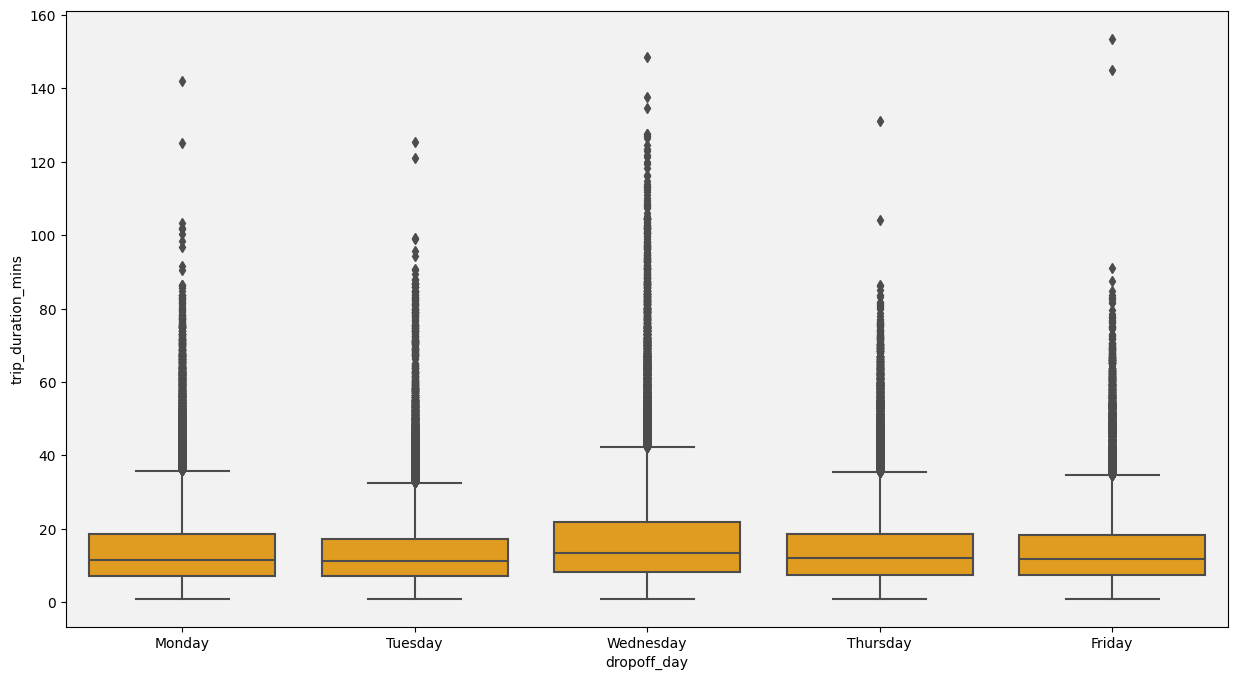

In [344]:
# Kruskal wallis H - checking the assumption of similar distributions for groups
plt.figure(figsize = (15,8))
ax = plt.axes()
ax.set_facecolor("#F2F2F2") 
sns.boxplot(x=taxidf1.dropoff_day, y=taxidf1.trip_duration_mins, color = 'orange')
plt.show()

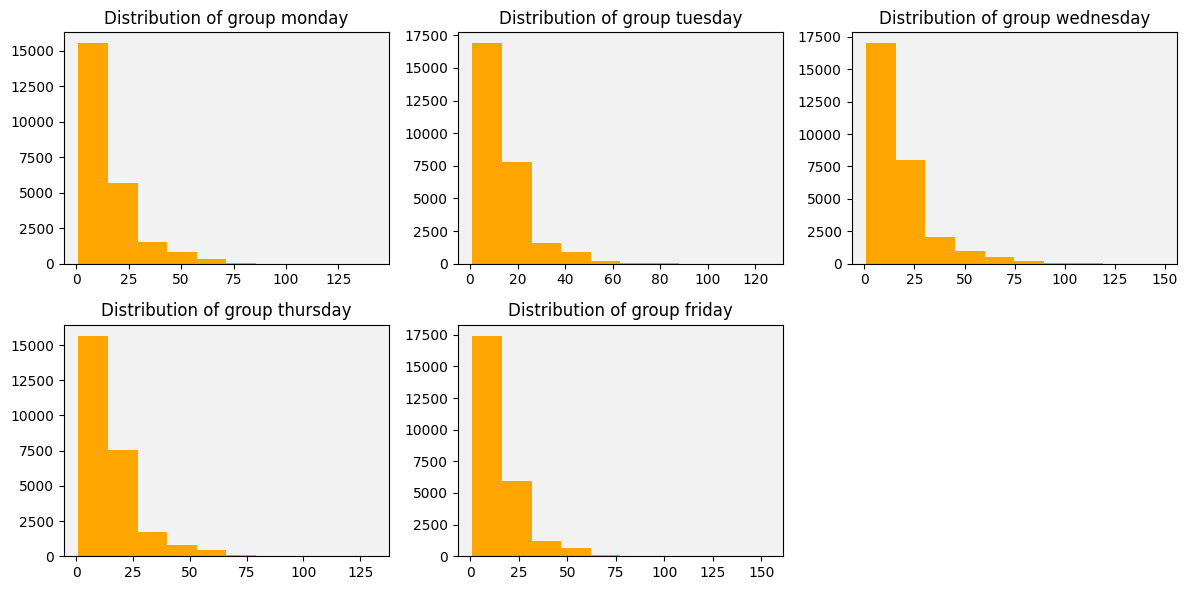

In [345]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# Plot the histogram for 'one' 
plt.subplot(2, 3, 1)
plt.hist(monday, color='orange')
plt.title('Distribution of group monday')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'two' 
plt.subplot(2,3, 2)
plt.hist(tuesday, color='orange')
plt.title('Distribution of group tuesday')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'three' 
plt.subplot(2,3, 3)
plt.hist(wednesday, color='orange')
plt.title('Distribution of group wednesday')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'four' 
plt.subplot(2,3, 4)
plt.hist(thursday, color='orange')
plt.title('Distribution of group thursday')
plt.gca().set_facecolor("#F2F2F2")

# Plot the histogram for 'five' 
plt.subplot(2,3, 5)
plt.hist(friday, color='orange')
plt.title('Distribution of group friday')
plt.gca().set_facecolor("#F2F2F2")


# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Since the distributions are likely similar; proceeding with kruskal test

<b>Kruskal-Wallis H Test to check dependency of trip duration on Dropoff day</b>

Null Hypothesis = Ho = "Dropoff day has no effect on trip durationt"

Alternate Hypothesis = Ha = "Dropoff day has an effect on trip duration"

`Significance Level = 0.05`

In [346]:
# Kruskal test to check dependency of dropoff day on trip duration
Ho =  "Dropoff day has no effect on trip duration"   # Stating the Null Hypothesis
Ha =  "Dropoff day has an effect on trip duration"   # Stating the Alternate Hypothesis

monday = taxidf1[taxidf1.dropoff_day == 'Monday']['trip_duration_mins']
tuesday = taxidf1[taxidf1.dropoff_day == 'Tuesday']['trip_duration_mins']
wednesday = taxidf1[taxidf1.dropoff_day == 'Wednesday']['trip_duration_mins']
thursday = taxidf1[taxidf1.dropoff_day == 'Thursday']['trip_duration_mins']
friday = taxidf1[taxidf1.dropoff_day == 'Friday']['trip_duration_mins']


f_dd, pval_dd = stats.kruskal(monday, tuesday, wednesday, thursday, friday)
# print('p-value : ', pval_dd)


if pval_dd < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {pval_dd.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {pval_dd.round(3)} > 0.05')

Dropoff day has an effect on trip duration as the p_value 0.0 < 0.05


In [ ]:
# From the statistical analysis, it can be seen that al features were found to be significant for predicting the total amount
# Though, it is not possible, the results might be due to the presence of outliers (16k rows)
# Since, we chose to keep the outliers as it is natural to have outlier in a real life data; 
# we can conclude that the statistical test results are not reliable as it is influenced by presence of outliers.